In [1]:
import datetime
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #, explained_variance_score
from sklearn.model_selection import train_test_split

# plot
import matplotlib.pyplot as plt


In [2]:
# from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
# from statsmodels.regression.linear_model import OLS
# from statsmodels.tools import add_constant
# from statsmodels.tsa import stattools

In [2]:
pv_train_set = pd.read_csv("../data/Training_data_set4/pv_train_set4.csv")
weather_train_set = pd.read_csv("../data/Training_data_set4/weather_train_set4.csv").sort_index(axis=1)
demand_train_set = pd.read_csv("../data/Training_data_set4/demand_train_set4.csv")

In [3]:
pv_train_set.isna().any()

datetime           False
irradiance_Wm-2     True
pv_power_mw         True
panel_temp_C        True
dtype: bool

In [79]:
weather_train_set.isna().any()

datetime           False
solar_location1     True
solar_location2     True
solar_location3    False
solar_location4    False
solar_location5    False
solar_location6    False
temp_location1     False
temp_location2     False
temp_location3     False
temp_location4      True
temp_location5     False
temp_location6     False
dtype: bool

In [5]:
demand_train_set.isna().any()

datetime     False
demand_MW    False
dtype: bool

In [7]:
pv_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46704 entries, 0 to 46703
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         46704 non-null  object 
 1   irradiance_Wm-2  46617 non-null  float64
 2   pv_power_mw      46668 non-null  float64
 3   panel_temp_C     46611 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.4+ MB


In [56]:
pv_train_set.isna().any()

datetime           False
irradiance_Wm-2     True
pv_power_mw         True
panel_temp_C        True
dtype: bool

In [3]:
pv_train_set.describe()

,irradiance_Wm-2,pv_power_mw,panel_temp_C
count,46617.000000,46668.000000,46611.000000
mean,150.157712,0.596751,12.114163
std,253.209273,1.009329,8.869242
min,0.000000,0.000000,-6.500000
25%,0.000000,0.000000,6.530000
50%,2.200000,0.000000,10.010000
75%,194.700000,0.770000,15.370000
max,1159.860000,3.810000,52.310000


In [32]:
pv_train_set.iloc[[0,-1],:]

,datetime,irradiance_Wm-2,pv_power_mw,panel_temp_C
0,2017-11-03 00:00:00,0.0,0.0,7.05
46703,2020-07-02 23:30:00,0.0,0.0,8.33


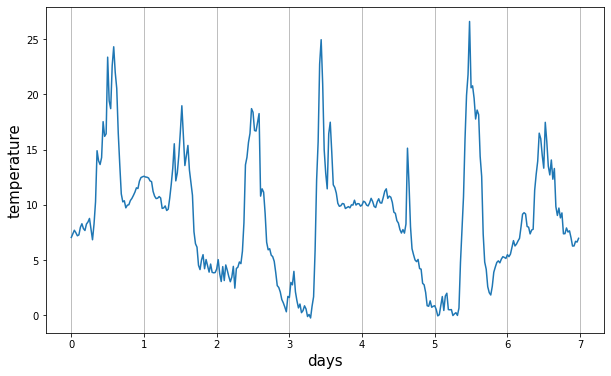

In [27]:
plt.figure(figsize=(10,6))
plt.plot(pv_train_set["panel_temp_C"][:48*7])
plt.xticks(ticks = np.linspace(0,48*7,8), labels = list(map(int,np.linspace(0,7,8))),size=10)
plt.grid(axis='x')
plt.xlabel("days",size=15)
plt.ylabel("temperature",size=15)
plt.show()

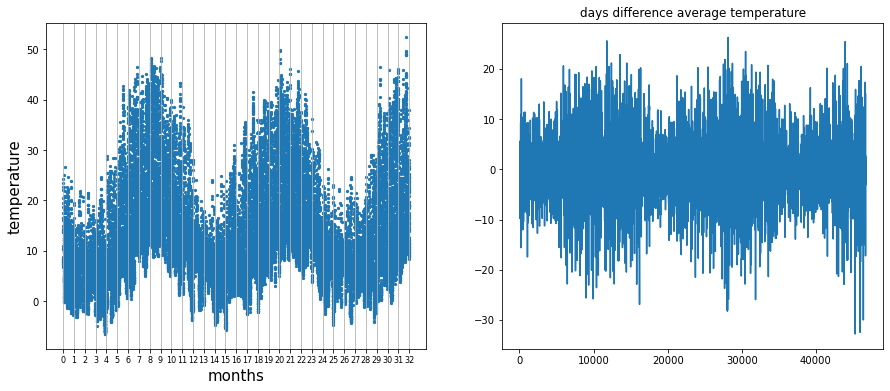

In [158]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
ax[0].scatter(pv_train_set.index,pv_train_set["panel_temp_C"],s=5, )
# 2+12*2+7 = 33
ax[0].set_xticks(ticks = np.linspace(0,pv_train_set.shape[0],33))
ax[0].set_xticklabels(list(map(int,np.linspace(0,32,33))))
ax[0].tick_params(axis = 'x', which = 'major', labelsize = 8)
ax[0].grid(axis='x')
ax[0].set_xlabel("months",size=15)
ax[0].set_ylabel("temperature",size=15)

# the temperature minus the temperature of yesterday
ax[1].plot(pv_train_set["panel_temp_C"]-pv_train_set["panel_temp_C"].shift(48))
# set the font size of the x tick
ax[1].tick_params(axis = 'x', which = 'major', labelsize = 10)
ax[1].set_title("days difference average temperature")
plt.show()

            panel_temp_C
datetime                
2017-11-30      8.417586
2017-12-31      6.388387
2018-01-31      6.481579
2018-02-28      4.183527
2018-03-31      6.132524
2018-04-30     11.610995
2018-05-31     16.461606
2018-06-30     19.728917
2018-07-31     22.440712
2018-08-31     18.962621
2018-09-30     15.635125
2018-10-31     11.912231
2018-11-30      9.097104


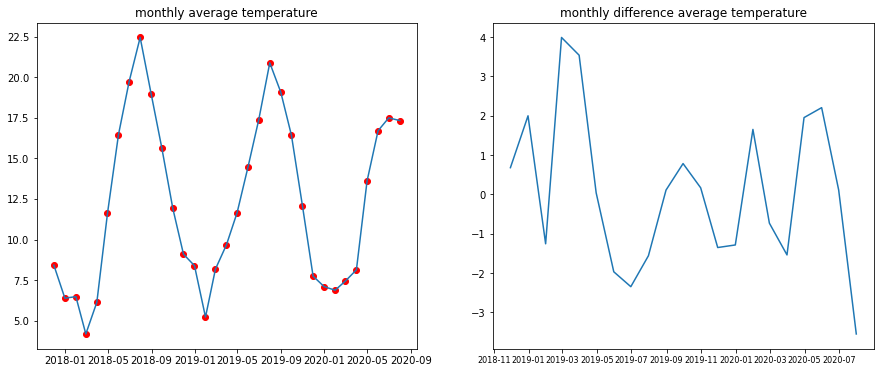

In [157]:
temp_date_df = pv_train_set.iloc[:,[0,3]].set_index("datetime")
# index must be the Datetime tpye to use the timeseries method in pandas
temp_date_df.index = pd.DatetimeIndex(temp_date_df.index)
monthly_mean = temp_date_df.resample('M').mean()
print(monthly_mean.head(13))
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
ax[0].plot(monthly_mean)
ax[0].scatter(monthly_mean.index,monthly_mean, color="r")
ax[0].set_title("monthly average temperature")
ax[1].plot(monthly_mean-monthly_mean.shift(12))
# set the font size of the x tick
ax[1].tick_params(axis = 'x', which = 'major', labelsize = 8)
ax[1].set_title("monthly difference average temperature")
plt.show()

In [88]:
weather_train_set[weather_train_set["temp_location4"].isna()].index

Int64Index([34008, 34009, 34010, 34011, 34012, 34013, 34014, 34015, 34016,
            34017, 34018, 34019, 34020, 34021, 34022, 34023, 34024, 34025,
            34026, 34027, 34028, 34029, 34030, 34031, 40584, 40585, 40586,
            40587, 40588, 40589, 40590, 40591, 40592, 40593, 40594, 40595,
            40596, 40597, 40598, 40599, 40600, 40601, 40602, 40603, 40604,
            40605, 40606, 40607],
           dtype='int64')

In [3]:
# using the data of i day before to fill the nans
def fill_nan_with_moving_average(df):
    for column in df.columns:
        for nan_index in df[df[column].isna()].index:
            n = 0
            fill_value = 0
            for i in range(1,4):
                if not pd.isnull(df[column][nan_index-48*i]):
                    fill_value += df[column][nan_index-48*i]
                    n+=1
                if not pd.isnull(df[column][nan_index+48*i]):
                    fill_value += df[column][nan_index+48*i]
                    n+=1
            fill_value /= n  
            df[column][nan_index] = fill_value
    return df

In [4]:
weather_train_set = fill_nan_with_moving_average(weather_train_set)

In [5]:
def calculate_hour(datetime):
    return int(datetime[11:13])*2 + int(datetime[14])/3


In [6]:
def calculate_day(real_datetime):
    return int(datetime.datetime.strptime(real_datetime, "%Y-%m-%d %H:%M:%S").strftime("%j"))

In [7]:
def merge_day_before_n(df, n, df_before):
    # used when the drop the columns
    df_before_copy = df_before.copy(deep=True)
    m = n
    while n>0:
        df_before_copy.index = df_before_copy.index + 48
        df = df.join(df_before_copy, rsuffix="_day"+str(m-n+1), how = "left")
        n -= 1
        
    df.sort_index(axis=1, inplace = True)
    df.drop(columns=df.columns[np.arange(1,m+1)],inplace = True,axis=1)    
    return df
# merge_day_before_n(pv_train_set.iloc[:,[0,1]], 2)

X is the Reanalysis weather data of the six places and the true weather data before today

In [8]:
def temp_sol_reg_data(o_half, pv_df, weather_df):
    """
    description: construct the X and Y for regression
    """
    # choose the data whether at half o'clock
    part_pv_df =pv_df[(pv_df.iloc[:,0].str[14]=="3")] if o_half else pv_df[(pv_df.iloc[:,0].str[14]=="0")]
        
    # using the hour as a variable
    part_pv_df["hour"] = part_pv_df["datetime"].apply(calculate_hour)  
#     part_pv_df['sin48'] = np.sin(2 * np.pi * part_pv_df["hour"] / 48)
#     part_pv_df['cos48'] = np.cos(2 * np.pi * part_pv_df["hour"] / 48)
#     part_pv_df['sin48_2'] = np.sin(4 * np.pi * part_pv_df["hour"] / 48)
#     part_pv_df['cos48_2'] = np.cos(4 * np.pi * part_pv_df["hour"] / 48)
    
#     part_pv_df["day"] = part_pv_df["datetime"].apply(calculate_day)
#     part_pv_df['sin365'] = np.sin(2 * np.pi * part_pv_df["day"] / 365.25)
#     part_pv_df['cos365'] = np.cos(2 * np.pi * part_pv_df["day"] / 365.25)
#     part_pv_df['sin365_2'] = np.sin(4 * np.pi * part_pv_df["day"] / 365.25)
#     part_pv_df['cos365_2'] = np.cos(4 * np.pi * part_pv_df["day"] / 365.25)
    
#     part_pv_df.drop(columns=["day","hour"],axis=1,inplace=True)
    
    weather_df["datetime"] = weather_df["datetime"].str[:13]
    part_pv_df["datetime"] = part_pv_df["datetime"].str[:13]
    joined_data = part_pv_df.set_index("datetime").join(weather_df.set_index("datetime"),on="datetime", how="inner")
    # we donot care the time series in the linear regresssion, so drop the rows where na shows up
    joined_data.dropna(how="any",axis=0,inplace=True)
    Y, X = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y"],axis=1)
    return X, Y
# temp_sol_reg_data(3,"0")    

In [9]:
def linear_predict(name, X, Y, draw_picture):
    """
    name(String): the column name used in the plot
    o_half(bool): True implicate latter we will use the half o'clock data, otherwise o'clock data
    pv_df, weather_df: two df that will be merged by "datetime"
    draw_picture(bool): weather to draw the prediction and real value
    """
     
    
    X, Y = X.values, Y.values
# try ElasticNetCV but get the samilar answer
# l1_ratio is a list, in which case the different values are 
# tested by cross-validation and the one giving the best prediction score is used.
#     elasticNetCV = ElasticNetCV(l1_ratio = [1e-4,0.001,0.01,0.1,0.5,1],
#                               alphas = [1e-4,1e-3,0.01, 0.1, 0.5,1], 
#                               max_iter = 1000, cv = 5,normalize = True).fit(X, Y)     
#     predict_Y = elasticNetCV.predict(X)

# try MLP but get the samilar answer
#     from sklearn.neural_network import MLPRegressor
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
#     temp_reg = MLPRegressor(hidden_layer_sizes=(100,10 )random_state=1, max_iter=5000,activation='relu').fit(X_train, y_train)
#     predict_Y = temp_reg.predict(X_test)

    # split the data into train and test, using train set to fit the model, using test set to get the score
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)
#     temp_reg = LassoCV(alphas = [1e-7,1e-6,1e-5,0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],normalize = True, 
#                 max_iter = 50000, cv = 10)
#     temp_reg.fit(X_train, y_train)
#     predict_Y = temp_reg.predict(X_test) 
    
    
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)
    train_size = int(len(Y)*0.8)
    X_train, X_test, y_train, y_test = X[:train_size],X[train_size:],Y[:train_size],Y[train_size:]
    temp_reg = LinearRegression().fit(X_train, y_train)    
    predict_Y = temp_reg.predict(X_test) 
    
    # draw picture
    if draw_picture:

        fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
        # the predictors of temp and solar at half and entire o'clock are different, but it is not true for pv data,
        # thus, using m to identify the plots interval
        m = 1
        if name == 'pv':
            m = 2
        ax[0].plot(temp_reg.predict(X[-24*m*7-1:]), linewidth=3,label="Predict "+ name)
        ax[0].scatter(np.arange(24*7*m+1), Y[-24*m*7-1:], c='orange', s=5, label="Real "+ name) 
        ax[0].set_xticks(np.linspace(0,24*m*7,8))
        xticks = pv_train_set["datetime"][-48*7-1:].reset_index(drop=True)
        xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
        ax[0].set_xticklabels(xticks)
        ax[0].legend() 
        ax[0].set_title("The final weak prediction")
        Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y.reshape(1, -1)[0],"y_test":y_test.reshape(1, -1)[0]}).sort_values("predict_Y").reset_index()
        ax[1].plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3, label="Predict "+ name)
        ax[1].scatter(Y_predict_Y.index, Y_predict_Y.y_test, c='orange', s=5, label="Real "+ name)
        ax[1].set_title("Sorted by the predicted value")
        plt.show()
        
    score1 = r2_score(y_test,predict_Y)
    score2 = mean_squared_error(y_test,predict_Y)
    

    # using the whole data to do regression again
    temp_reg = LinearRegression().fit(X, Y)
       
#     R2 = temp_reg.score(X, Y)
#     predict_Y = temp_reg.predict(X)
#     MSE = mean_squared_error(Y,predict_Y)  

#     return elasticNetCV.score(X, Y), mean_squared_error(Y,predict_Y), elasticNetCV  
#     return regr.score(X,Y), mean_squared_error(Y,predict_Y)
    return score1, score2, temp_reg

In [10]:
def choose_n_day(name, o_half, n):
    """
    description: use the plots to choose how many day before can be used in the prediction
    """
    if name=="temp":
        weather_train_columns = np.append(0,np.arange(7,13))
        pv_train_columns = [0,3]
    elif name=="solar":
        weather_train_columns = np.arange(7)
        pv_train_columns = [0,1]  
    elif name == "pv":
        weather_train_columns = np.arange(weather_train_set.shape[1])
        pv_train_columns = [0,2]
    weather_df = weather_train_set.iloc[:,weather_train_columns]  
    R_MSE = []
    for i in range(n):
        pv_weather_df = merge_day_before_n(pv_train_set.iloc[:,pv_train_columns], i, pv_train_set.iloc[:,pv_train_columns])
        X, Y = temp_sol_reg_data(o_half, pv_weather_df, weather_df) 
        R_MSE.append(linear_predict(name,X,Y, False)[:2])
    R_MSE = np.array(R_MSE).T
    
    # 
    draw_R_MSE(R_MSE,n)

In [11]:
def draw_R_MSE(R_MSE,n):
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
    ax[0].plot(np.arange(n),R_MSE[0], linewidth=3,c="b", label="coefficient of determination R2")
    ax[1].plot(np.arange(n),R_MSE[1], linewidth=3,c="r", label="MSE")
    ax[0].set_xlabel('n day before')
    ax[1].set_xlabel('n day before')
    ax[0].legend()
    ax[1].legend()
    plt.show() 

### Temperature Prediction

In [12]:
temp_weather_df = weather_train_set.iloc[:,np.append(0,np.arange(7,13))]

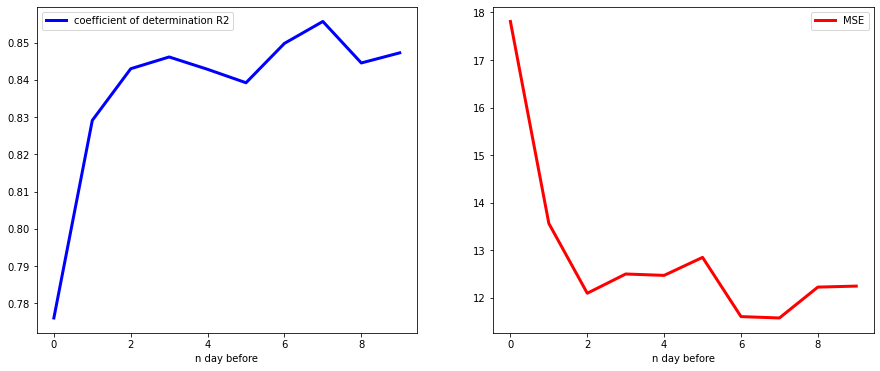

In [14]:
# at half o'clock
choose_n_day("temp", True,10)

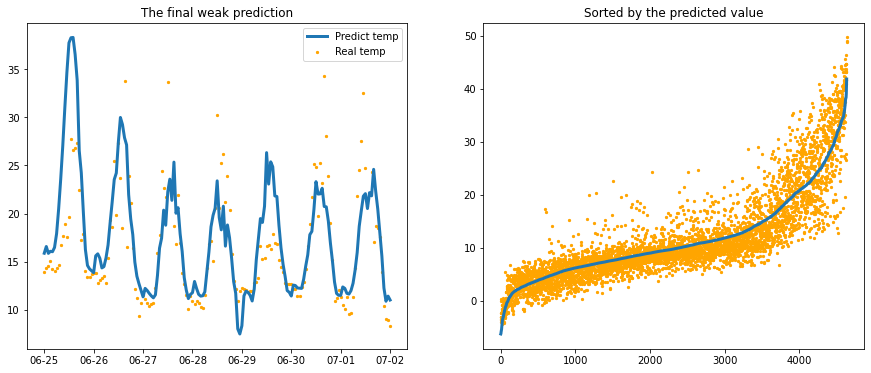

Coefficient of determination R2 is : 0.835825 and MSE is: 12.417324


In [13]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]],2,pv_train_set.iloc[:,[0,3]])
pv_temp_df = pv_temp_df.rename(columns={"panel_temp_C":"Y"})
X, Y = temp_sol_reg_data(True, pv_temp_df, temp_weather_df)
R2,MSE,temp_h_reg =  linear_predict("temp",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [233]:
# don't forget to common the line using the whole data to do the prediction in the linear_predict function
Y_test = Y[int(len(Y)*0.8):].values
Y_pred = temp_h_reg.predict(X[int(len(Y)*0.8):])

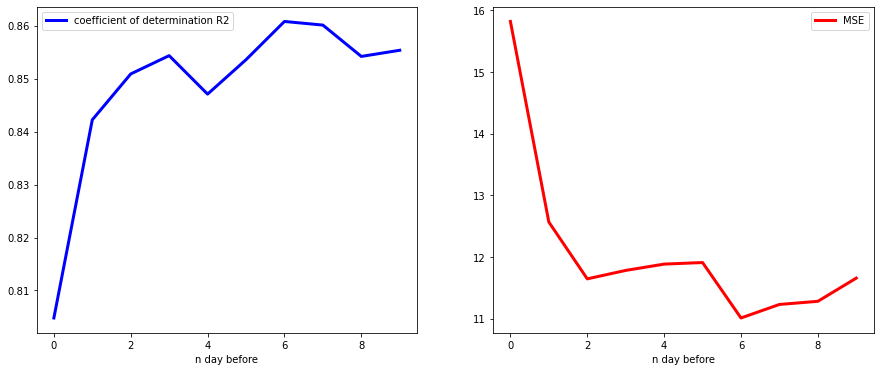

In [110]:
# at o'clock
choose_n_day("temp", False,10)

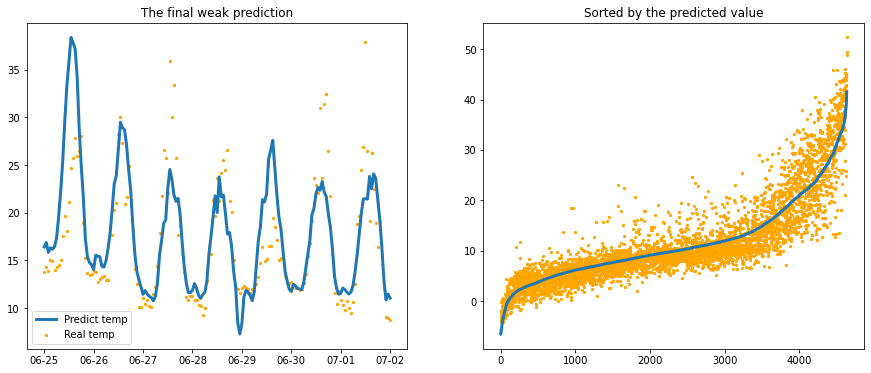

Coefficient of determination R2 is : 0.847184 and MSE is: 11.716934


In [14]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]], 2, pv_train_set.iloc[:,[0,3]])
pv_temp_df = pv_temp_df.rename(columns={"panel_temp_C":"Y"})
X, Y = temp_sol_reg_data(False, pv_temp_df, temp_weather_df)
R2,MSE,temp_o_reg =  linear_predict("temp",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [236]:
Y_test = np.append(Y_test,Y[int(len(Y)*0.8):].values)
Y_pred = np.append(Y_pred,temp_h_reg.predict(X[int(len(Y)*0.8):]))
print("The combined MSE for total temperature data is: %f" % (mean_squared_error(Y_test,Y_pred)))

The combined MSE for total temperature data is: 12.038860


### Solar Prediction

In [15]:
sol_weather_df = weather_train_set.iloc[:,np.arange(7)]

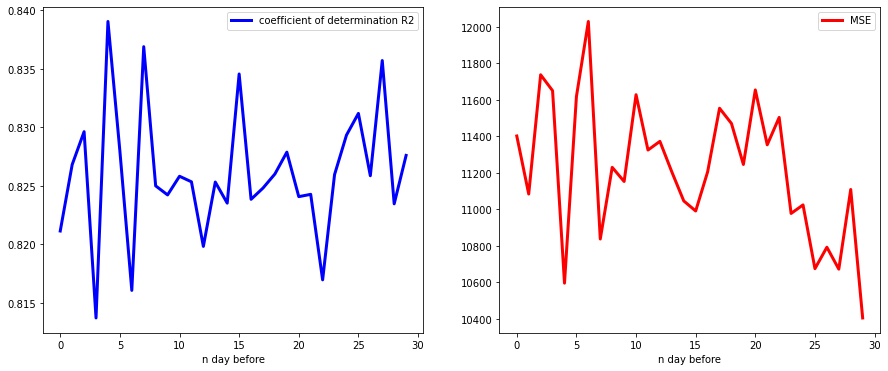

In [17]:
# at half o'clock
choose_n_day("solar", True,30)

the R2 fluctuates around after merge the data before n days, thus the data before n days helps to improve the result a little. We do not using the historical solar data

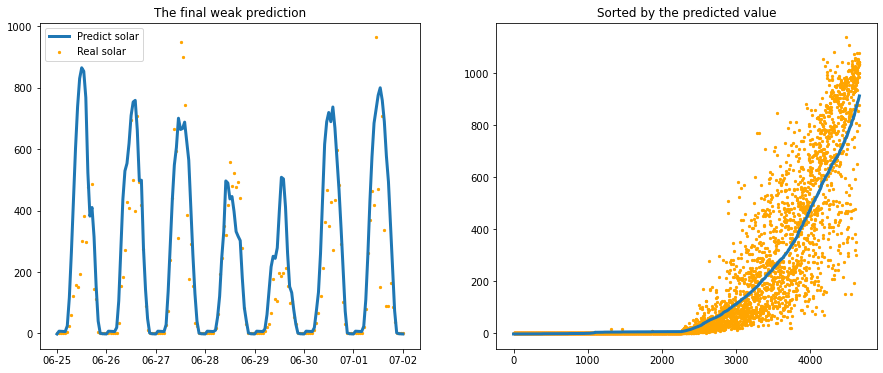

Coefficient of determination R2 is : 0.845374 and MSE is: 11936.274591


In [16]:
pv_sol_df = pv_train_set.iloc[:,[0,1]]
# pv_sol_df = merge_day_before_n(pv_train_set.iloc[:,[0,1]], 2, pv_train_set.iloc[:,[0,1]])
pv_sol_df =  pv_sol_df.rename(columns={"irradiance_Wm-2":"Y"})
X,Y = temp_sol_reg_data(True, pv_sol_df, sol_weather_df)
R2,MSE,sol_h_reg =  linear_predict("solar",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

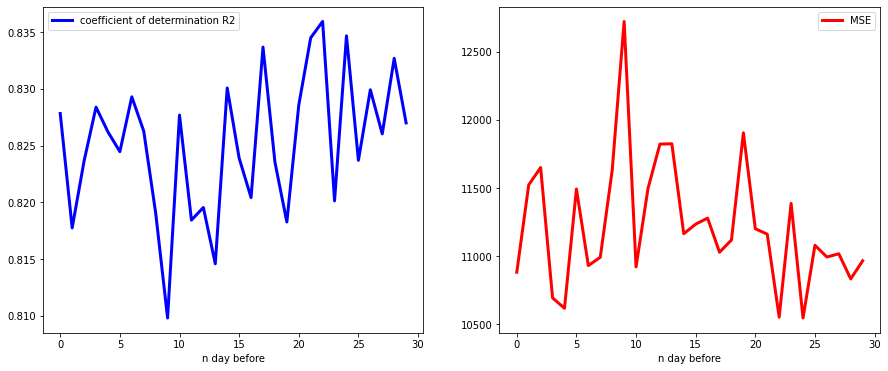

In [116]:
# at o'clock
choose_n_day("solar", False,30)

the R2 fluctuates around after merge the data before n days, thus the data before n days helps to improve the result a little. We do not using the historical solar data

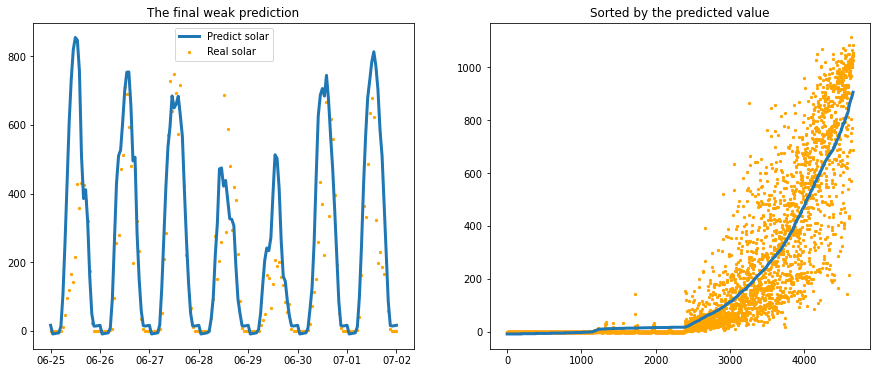

Coefficient of determination R2 is : 0.841542 and MSE is: 12054.083291


In [17]:
pv_sol_df = pv_train_set.iloc[:,[0,1]]
pv_sol_df = pv_sol_df.rename(columns={"irradiance_Wm-2":"Y"})
X,Y = temp_sol_reg_data(False, pv_sol_df, sol_weather_df)
R2,MSE,sol_o_reg =  linear_predict("solar",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [18]:
# deal with the na in pv data
pv_train_set_new = pv_train_set.copy(deep=True)
def fill_na(column, n, df_fill=pv_train_set_new): 
    """
    n: merge the data of n day before
    """
    if column=="temp":
        pv_column = 3
        weather_df = temp_weather_df
        regressors = [temp_o_reg, temp_h_reg]
    elif column == "solar":
        pv_column = 1
        weather_df = sol_weather_df
        regressors = [sol_o_reg, sol_h_reg]
    elif column == "pv":
        pv_column = 2
        regressor = pv_reg  
        
    while df_fill.iloc[:,pv_column].isna().any():
        
        if column != "pv":
            na_row =  df_fill[df_fill.iloc[:,pv_column].isna()].iloc[[0],[0,pv_column]]
            # choose the regressor according to weather it is half o'clock. If the judgement is True,then using the half o'clock regressor 
            regressor = regressors[na_row.iloc[0,0][14] == "3"]
        else:
            na_row =  df_fill[df_fill.iloc[:,pv_column].isna()].iloc[[0],:]
            
        # to locate the row in the df_fill
        na_row_index = na_row.index   
        na_row = merge_day_before_n(na_row, n, df_fill.iloc[:,[0,pv_column]]).reset_index(drop=True)
            
        # using the hour as a variable
        na_row["hour"] = na_row["datetime"].apply(calculate_hour)
        
        # construct X
        if column != "pv":
            weather_row = weather_df[weather_df["datetime"].str[:13]==na_row.iloc[0,0][:13]].iloc[:,1:].reset_index(drop=True)
            X = np.array(pd.concat([na_row.iloc[:,2:],weather_row],axis=1))
        else:
            # select the temp, solar, the historical and the hour data
            X = np.array(na_row.filter(regex='(\d$)|(C$)|(r$)', axis=1).sort_index(axis=1))
            
        predict_y = regressor.predict(X)      
        if column != "temp":
            predict_y = max(predict_y, 0)
            
        df_fill.iloc[na_row_index,pv_column] = predict_y
        
fill_na("temp",2)
fill_na("solar",0)

In [19]:
def pv_X_Y(pv_df,n):
    """
    merge pv data with the days before n
    """
    pv_pv_df = merge_day_before_n(pv_df, n, pv_df.iloc[:,[0,2]])
    pv_pv_df.dropna(how="any",inplace=True)
    
    Y = pv_pv_df["pv_power_mw"]
    
    pv_pv_df["hour"] = pv_pv_df["datetime"].apply(calculate_hour)
    
    X = pv_pv_df.filter(regex='(\d$)|(C$)|(r$)', axis=1).sort_index(axis=1)
 
    return X, Y

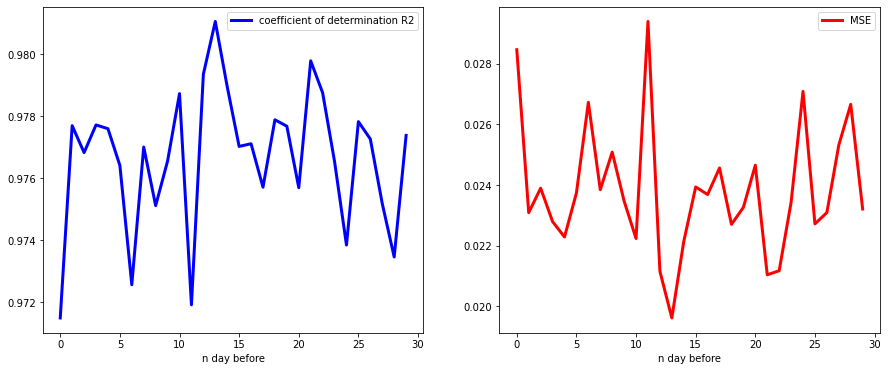

In [149]:
R_MSE = []
n=30
for i in range(n):
    X, Y = pv_X_Y(pv_train_set_new,i)
    R_MSE.append(linear_predict("pv",X,Y,False)[:2])
R_MSE = np.array(R_MSE).T
draw_R_MSE(R_MSE,n)

the result violate around, cannot see prominent improve

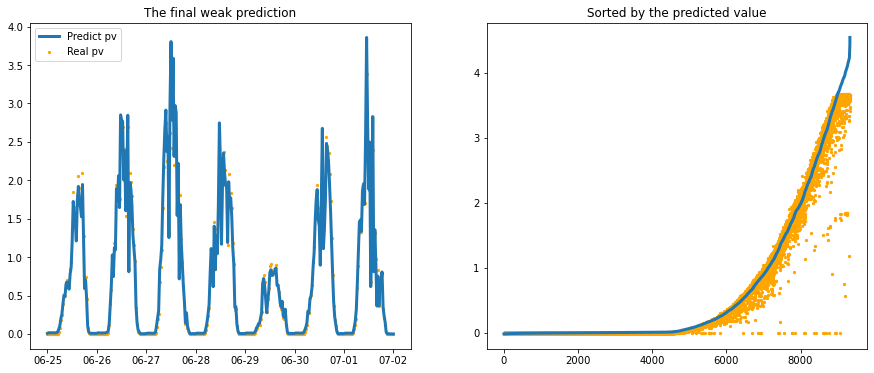

Coefficient of determination R2 is : 0.963452 and MSE is: 0.040182


In [20]:
X, Y = pv_X_Y(pv_train_set_new,0)
R2,MSE,pv_reg =  linear_predict("pv",X,Y,True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [21]:
# using the pv_reg to fill the na in pv column
fill_na("pv",0)

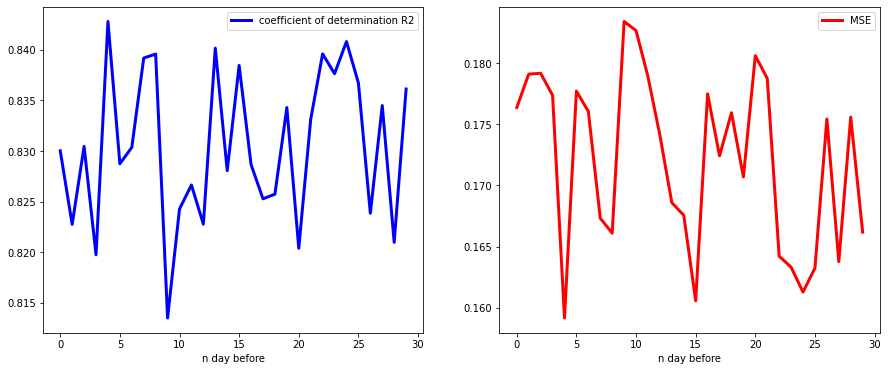

In [217]:
# using the weather data to predict the pv directly
choose_n_day('pv',True,30)

compare the two models predict by two step and by one steps

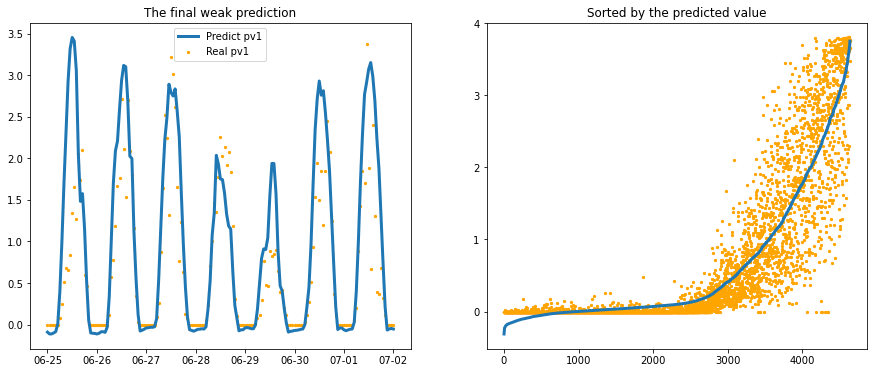

Coefficient of determination R2 is : 0.830015 and MSE is: 0.176364


In [19]:
X, Y = temp_sol_reg_data(True, pv_train_set.iloc[:,[0,2]],weather_train_set)
R2,MSE,pv_wether_reg =  linear_predict("pv1",X,Y,True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [247]:
X, Y = temp_sol_reg_data(False, pv_train_set.iloc[:,[0,2]],weather_train_set)
R2,MSE,pv_wether_reg1 =  linear_predict("pv1",X,Y,False)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

Coefficient of determination R2 is : 0.821719 and MSE is: 0.181386


In [222]:
pv_train_set_new_test = pv_train_set_new.copy(deep=True)
pv_train_set_new_test.iloc[-48*7-1:,[1,2,3]] = np.nan

In [232]:
fill_na("temp",2,pv_train_set_new_test)
fill_na("solar",0,pv_train_set_new_test)
fill_na("pv",0,pv_train_set_new_test)

the final weak Coefficient of determination R2 is : 0.400989,0.654621 and MSE is: 0.441704,0.426555


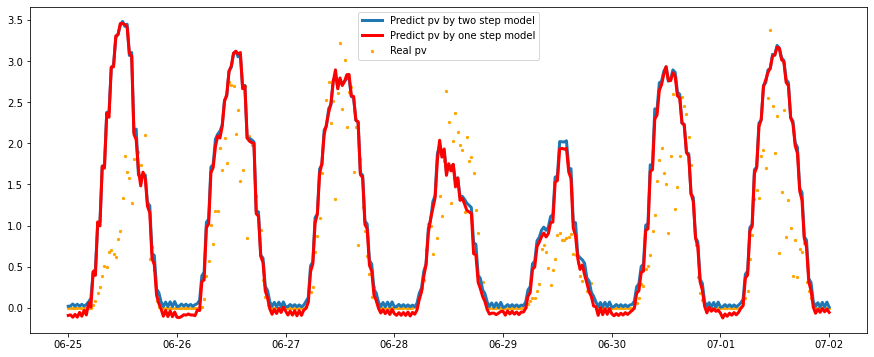

In [273]:
predict_one_step = pd.DataFrame(index=np.arange(48*7+1),columns=["predict"])
X, _ = temp_sol_reg_data(True, pv_train_set.iloc[-48*7-1:,[0,2]],weather_train_set)
predict_one_step["predict"][predict_one_step.index%2==0 ] = pv_wether_reg.predict(X)
X, _ = temp_sol_reg_data(False, pv_train_set.iloc[-48*7-1:,[0,2]],weather_train_set)
predict_one_step["predict"][predict_one_step.index%2!=0 ] = pv_wether_reg1.predict(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15, 6))
ax.plot(pv_train_set_new_test["pv_power_mw"][-48*7-1:].values, linewidth=3,label="Predict pv by two step model")
ax.plot(predict_one_step["predict"], linewidth=3,color="r", label="Predict pv by one step model")
ax.scatter(np.arange(48*7+1), pv_train_set_new["pv_power_mw"][-48*7-1:], c='orange', s=5, label="Real pv") 
ax.set_xticks(np.linspace(0,48*7,8))
xticks = pv_train_set["datetime"][-48*7-1:].reset_index(drop=True)
xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
ax.set_xticklabels(xticks)
ax.legend() 

R21 = r2_score(pv_train_set_new["pv_power_mw"][-48*7-1:],pv_train_set_new_test["pv_power_mw"][-48*7-1:].values)
MSE1 = mean_squared_error(pv_train_set_new["pv_power_mw"][-48*7-1:],pv_train_set_new_test["pv_power_mw"][-48*7-1:].values)
R22 = r2_score(predict_one_step["predict"],pv_train_set_new["pv_power_mw"][-48*7-1:])
MSE2 = mean_squared_error(predict_one_step["predict"],pv_train_set_new["pv_power_mw"][-48*7-1:])
print("the final weak Coefficient of determination R2 is : %f,%f and MSE is: %f,%f" % (R21,R22,MSE1,MSE2))

## time series Start

In [22]:
# time series
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
# from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA 

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# acf and pacf, default lags = 31
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(figsize=(15.,6))
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=lags, ax=ax2)
    plt.show()

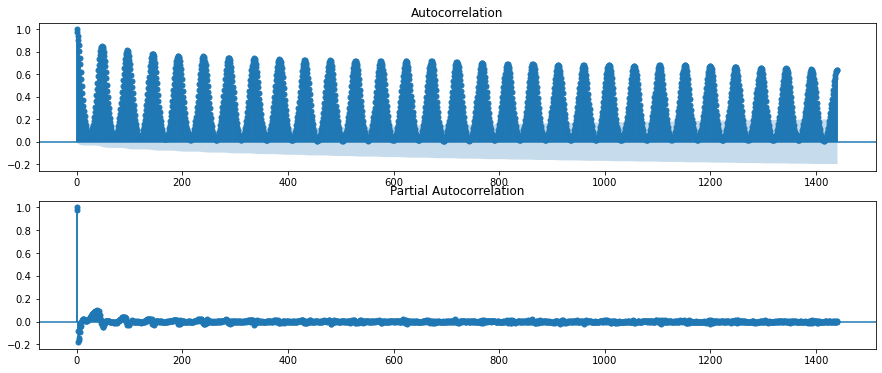

In [31]:
# draw a month of the data
draw_acf_pacf(pv_train_set_new["panel_temp_C"].values, lags=30*48) # irradiance_Wm-2   panel_temp_C  pv_power_mw

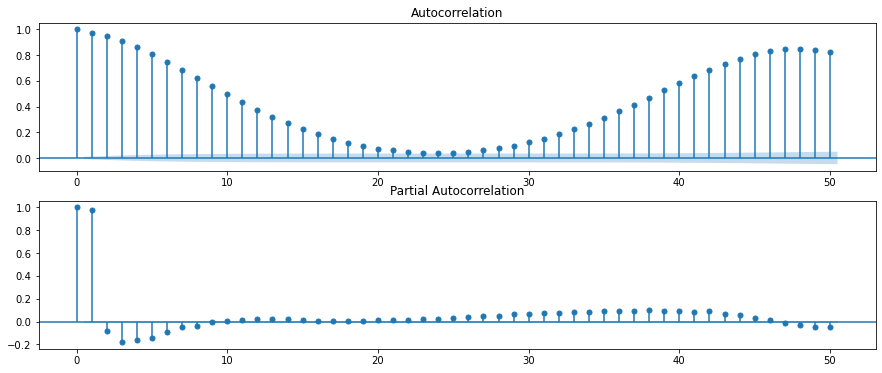

In [209]:
draw_acf_pacf(pv_train_set_new["panel_temp_C"].values, lags=50)

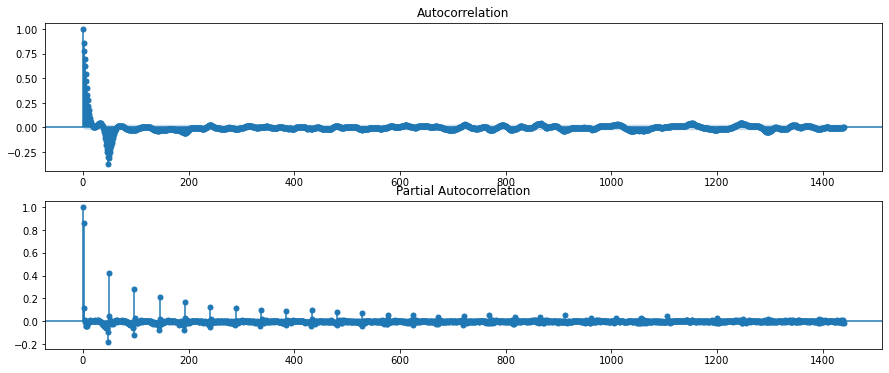

In [42]:
draw_acf_pacf(pv_train_set_new["panel_temp_C"].diff(periods=48).dropna(), lags=30*48) # irradiance_Wm-2   panel_temp_C  pv_power_mw

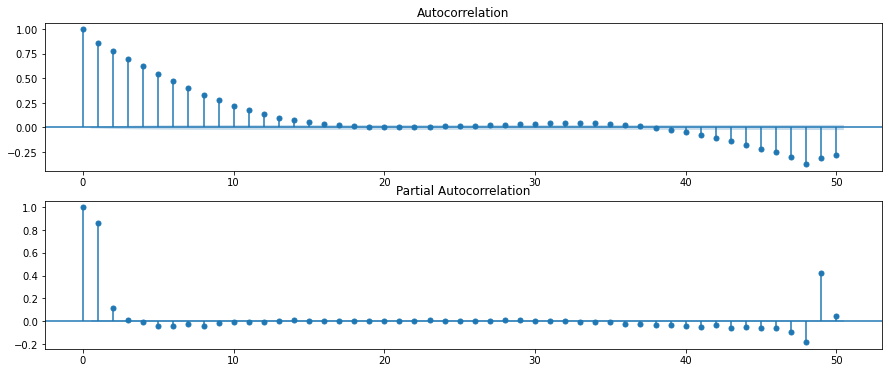

In [43]:
draw_acf_pacf(pv_train_set_new["panel_temp_C"].diff(periods=48).dropna(), lags=50)

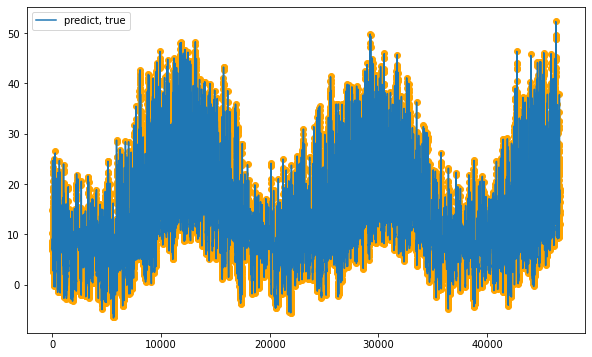

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit3 = ExponentialSmoothing(temp_ts["panel_temp_C"].values[:-7], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
plt.figure(figsize=(10,6))
plt.plot(fit3.fittedvalues)
plt.scatter(np.arange(temp_ts.shape[0])[:-7],temp_ts["panel_temp_C"].values[:-7], color="orange")
plt.legend(["predict, true"])

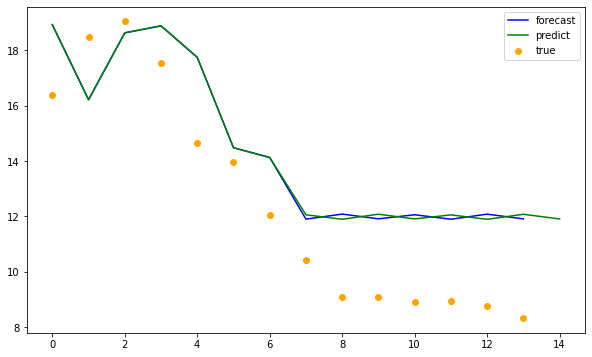

In [37]:
plt.figure(figsize=(10,6))
plt.plot(list(fit3.fittedvalues[-7:]) + list(fit3.forecast(7)), color="b")
plt.plot(list(fit3.fittedvalues[-7:]) + list(fit3.predict(temp_ts.shape[0],temp_ts.shape[0]+7)), color="g")
plt.scatter(np.arange(14),temp_ts["panel_temp_C"][-14:], color="orange")
plt.legend(["forecast","predict", "true"])

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
temp_diff1 = pv_train_set_new["panel_temp_C"].diff(periods=48).dropna()
res = sm.tsa.arma_order_select_ic(temp_diff1, max_ar=7, max_ma =2, ic=["aic", "bic"], trend="nc")
res.aic_min_order

(7, 0)

In [ ]:
ARIMA(endog=temp_diff1,seasonal_order=(,0,,4))

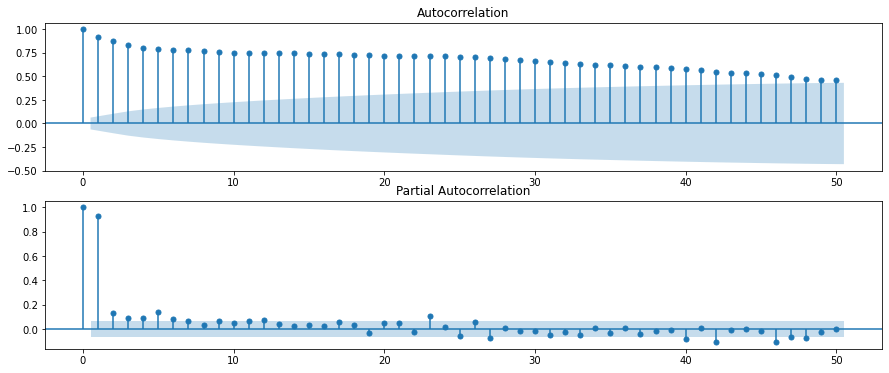

In [23]:
temp_day_mean = temp_ts.resample('D').mean()
draw_acf_pacf(temp_day_mean, lags=50)

In [236]:
temp_month_mean = temp_month_mean.rename("month_average")
temp_month_mean.head()

datetime
2017-11    8.287125
2017-12    6.388387
2018-01    6.481579
2018-02    4.183527
2018-03    6.097559
Name: month_average, dtype: float64

In [23]:
temp_day_mean = temp_ts["panel_temp_C"].resample('D').mean()
temp_month_mean = temp_ts["panel_temp_C"].resample('M').mean()
temp_ts["day"] = temp_ts.index.strftime("%Y-%m-%d")
temp_ts["month"] = temp_ts.index.strftime("%Y-%m")
temp_day_mean.index = temp_day_mean.index.strftime("%Y-%m-%d")
temp_month_mean.index = temp_month_mean.index.strftime("%Y-%m")
temp_day_mean.rename("day_average",inplace=True)
temp_month_mean.rename("month_average",inplace=True)
temp_ts = temp_ts.join(temp_day_mean,on="day",how="left").drop("day",axis=1)
temp_ts = temp_ts.join(temp_month_mean,on="month",how="left").drop("month",axis=1)

In [ ]:
resDiff = sm.tsa.arma_order_select_ic((temp_ts["panel_temp_C"] - temp_ts["month_average"]).diff(periods=48).diff().dropna(), max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


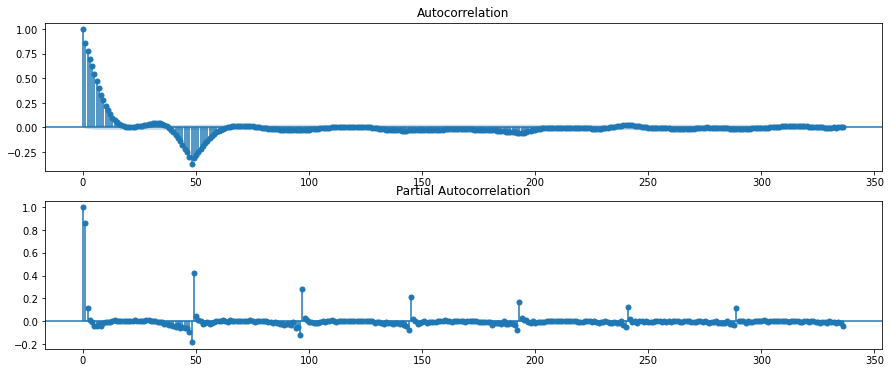

In [123]:
draw_acf_pacf((temp_ts["panel_temp_C"]).diff(periods=48).dropna(), lags=7*48)

可以看出temperature的period = 48的one order differencing与lag = 48\*n的序列autoregression,考虑使用n个48 lag的自回归方程

In [ ]:
def add_time_variables(df):
    df["hour"] = df["datetime"].apply(calculate_hour)
    df["day"] = df["datetime"].apply(calculate_day)
    df['sin365'] = np.sin(2 * np.pi * df["day"] / 365.25)
    df['cos365'] = np.cos(2 * np.pi * df["day"] / 365.25)
    df['sin365_2'] = np.sin(4 * np.pi * df["day"] / 365.25)
    df['cos365_2'] = np.cos(4 * np.pi * df["day"] / 365.25)

    df['month'] = df["datetime"].str[5:7]
    month_dummies = pd.get_dummies(df['month'],drop_first=True)
    month_dummies.columns = ['month-'+ str(m) for m in range(2,13)]

    df = pd.concat([df, month_dummies], axis=1).drop(columns=["day","month"],axis=1)
    return df

In [30]:
def select_by_aic(X,Y):
    aics = []
    model_X = []
    # all columns
    results = sm.OLS(Y,X).fit()
    aics.append(results.aic)
    model_X.append(X.columns)
    # delete location i
    for i in range(1,7):
        X_new = X.drop(columns=["temp_location" + str(i)],axis=1)
        results = sm.OLS(Y.values,X_new.values).fit()
        aics.append(results.aic)
        model_X.append(X_new.columns)
    X_new =X.drop(columns=X.filter(regex="month-\d",axis=1).columns,axis=1)
    results = sm.OLS(Y.values,X_new.values).fit()
    aics.append(results.aic)
    model_X.append(X_new.columns)
    X_new =X.drop(columns=X.filter(regex="\S*365\S*",axis=1).columns,axis=1)
    results = sm.OLS(Y.values,X_new.values).fit()
    aics.append(results.aic)
    model_X.append(X_new.columns)
    return model_X[aics.index(min(aics))]

In [28]:
def lasso_regression(X, Y):
#     X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1,test_size=0.2)
    train_size = int(Y.shape[0]*0.8)
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:],Y[:train_size], Y[train_size:]    
    from sklearn.linear_model import LassoCV
    lassoCV = LassoCV(alphas = [1e-7,1e-6,1e-5,0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],normalize = True, 
                max_iter = 50000, cv = 10)
    lassoCV.fit(X_train, y_train)
    predict_Y = lassoCV.predict(X_test) 
    
    # Plot important coefficients
    coefs = pd.Series(lassoCV.coef_, index = X_train.columns)
    print("Lasso picked " + str(sum(abs(coefs) >=0.05)) + " features and eliminated the other " +  \
          str(sum(abs(coefs)<=0.05)) + " features, which are: " + ", ".join(coefs[abs(coefs)<=0.05].index.tolist()))
    coefs = coefs[abs(coefs)>=0.05].sort_values()
    coefs.plot(kind = "barh")
    plt.title("Figure 12: Coefficients in the Lasso Model")
    plt.show()
    
    
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (15, 6))
    ax[0].plot(predict_Y[-48*7+-1:], linewidth=3,label="Predict value")
    ax[0].scatter(np.arange(48*7+1), y_test.values.flatten()[-48*7-1:], c='orange', s=5, label="Real value") 
    ax[0].set_xticks(np.linspace(0,48*7,8))
    xticks = pv_train_set_new["datetime"][-48*7-1:].reset_index(drop=True)
    xticks = xticks[xticks.index.isin(np.linspace(0,48*7,8))].str[5:10].values
    ax[0].set_xticklabels(xticks)
    ax[0].legend() 
    ax[0].set_title("The final weak prediction")

    Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y,"y_test":y_test.values.flatten()}).sort_values("predict_Y").reset_index()
    ax[1].plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3, label="Predict value")
    ax[1].scatter(Y_predict_Y.index, Y_predict_Y.y_test, c='orange', s=5, label="Real value")
    ax[1].set_title("Sorted by the predicted value")
    plt.show()
    return lassoCV.alpha_, 


In [ ]:
def build_sarimax_model(X,Y,hour):
    Y_pred = pd.DataFrame(index=Y.index,columns=["Y_pred"])
    Y_test = pd.DataFrame(index=Y.index,columns=["Y_test"])
    for i in range(48):
        exog = X[hour==i]
        ts = Y[hour==i]
        train_size = int(ts.shape[0]*0.8)
        exog_train, ts_train, exog_test, ts_test = exog[:train_size], ts[:train_size],exog[train_size:], ts[train_size:]
        arimax = sm.tsa.arima.ARIMA(ts_train,exog=exog_train,order=(3,1,2), enforce_stationarity=False, enforce_invertibility=False).fit()
        Y_test[Y_test.index.isin(ts_test.index)] = ts_test
        Y_pred[Y_pred.index.isin(ts_test.index)] = arimax.forecast(ts_test.shape[0],exog = exog_test.values).values.reshape(-1,1)
    return Y_pred, Y_test

In [ ]:
pv_df = pv_train_set_new[["datetime","panel_temp_C"]].copy(deep=True).rename(columns={"panel_temp_C":"Y"})
weather_df = temp_weather_df.copy(deep=True)

pv_df = add_time_variables(pv_df)

weather_df["datetime"] = weather_df["datetime"].str[:13]
pv_df["datetime"] = pv_df["datetime"].str[:13]
joined_data = pv_df.join(weather_df.set_index("datetime"),on="datetime", how="left")

# joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
# joined_data.dropna(how="any",axis=0,inplace=True)
Y_temp, X_temp = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y","hour","datetime"],axis=1)
hour = joined_data["hour"]

In [26]:
import statsmodels.api as sm
results = sm.OLS(Y_temp, X_temp).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.921
Method:                 Least Squares   F-statistic:                          2.599e+04
Date:                Mon, 28 Jun 2021   Prob (F-statistic):                        0.00
Time:                        22:11:33   Log-Likelihood:                     -1.3331e+05
No. Observations:               46668   AIC:                                  2.667e+05
Df Residuals:                   46647   BIC:                                  2.668e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365             0.5992      0.177      3.382      0.001       0.252       0.946
cos365             5.6991      0.138     41.270      0.000       5.428       5.970
sin365_2          -0.3687      0.094     -3.912      0.000      -0.553      -0.184
cos365_2           1.1458      0.094     12.254      0.000       0.963       1.329
month-2            2.8770      0.148     19.468      0.000       2.587       3.167
month-3            5.8200      0.224     26.039      0.000       5.382       6.258
month-4            7.9767      0.273     29.212      0.000       7.442       8.512
month-5           10.4618      0.292     35.839      0.000       9.890      11.034
month-6           11.0354      0.295     37.375      0.000      10.457      11.614
month-7           12.2610      0.308     39.749      0.000      11.656      12.866
month-8           11.7360      0.301     38.977      0.000      11.146      12.326
month-9           10.4503      0.300     34.885      0.000       9.863      11.037
month-10           7.5802      0.281     26.948      0.000       7.029       8.132
month-11           3.5047      0.232     15.112      0.000       3.050       3.959
month-12           0.6984      0.154      4.546      0.000       0.397       1.000
temp_location1     2.8444      0.066     42.951      0.000       2.715       2.974
temp_location2     1.7239      0.055     31.603      0.000       1.617       1.831
temp_location3    -1.6517      0.046    -36.175      0.000      -1.741      -1.562
temp_location4     0.6499      0.022     29.932      0.000       0.607       0.692
temp_location5    -2.3080      0.085    -27.017      0.000      -2.475      -2.141
temp_location6    -0.4790      0.081     -5.888      0.000      -0.638      -0.320
==============================================================================
Omnibus:                     6650.122   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13371.350
Skew:                           0.884   Prob(JB):                         0.00
Kurtosis:                       4.937   Cond. No.                         925.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The P values of the variables are all less than 0.05, which means the variable are all significant.

In [27]:
select_by_aic(X_temp,Y_temp)

Index(['sin365', 'cos365', 'sin365_2', 'cos365_2', 'month-2', 'month-3',
       'month-4', 'month-5', 'month-6', 'month-7', 'month-8', 'month-9',
       'month-10', 'month-11', 'month-12', 'temp_location1', 'temp_location2',
       'temp_location3', 'temp_location4', 'temp_location5', 'temp_location6'],
      dtype='object')

We try to use the aic to choose the most suitable variable sets, which also suggests that we should use all the variables.

Lasso picked 21 features and eliminated the other 0 features, which are: 


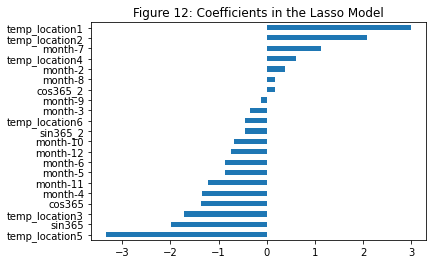

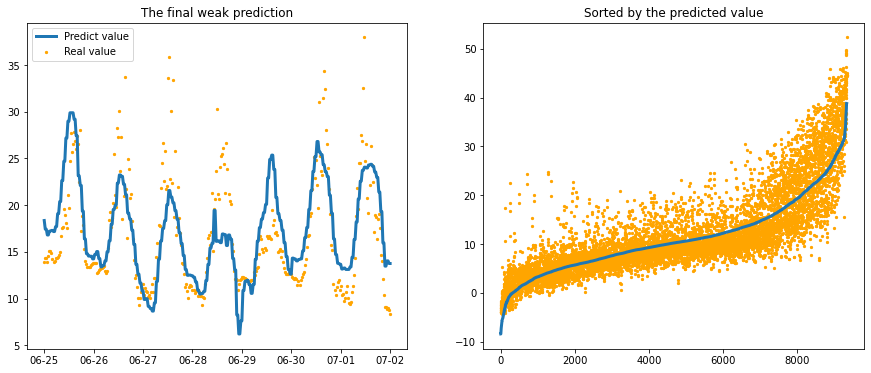

(1e-05,)

In [29]:
lasso_regression(X_temp,Y_temp)

lasso regression also selects all the variables if we choose the variables whose estimated coefficient is greater than 0.05

In [223]:
Y_pred_temp, Y_test_temp = build_sarimax_model(X_temp,Y_temp,hour)        

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was pr

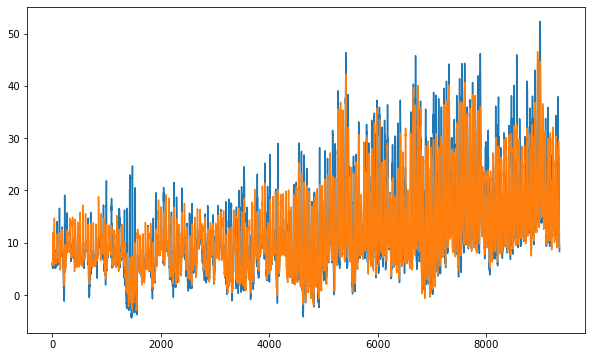

In [225]:
Y_test_temp.dropna(inplace=True)
Y_pred_temp.dropna(inplace=True)
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':Y_test_temp.values.reshape(1,-1)[0],'pred':Y_pred_temp.values.reshape(1,-1)[0]}))
plt.show()

In [226]:
print('ARIMAX model MSE for temperature:{}'.format(mean_squared_error(Y_test_temp,Y_pred_temp)))

ARIMAX model MSE:10.1354121057073


If we build one model for the whole data, we can see from the acf and pacf, no matter how many differencing we use,the data still have more than 50 orders of the autoregressive and moving average components. Thus, we try to decompose the model into 48 sub-models to deal with each half hour data.
We use the data of 00:00:00 each day as an example. The data now have less orders of the autoregressive and moving average components. If we make the first-order difference,the patterm is more pretty.The second-order difference have very little improvement,thus, we finally choose to use the first-order difference on this data.We use aic to choose the order of autoregressive and moving average components and get 3 and 2 respectively

In [25]:
# temp_00 = pv_train_set_new[pv_train_set_new["datetime"].str[-8:]=="13:30:00"][["datetime","panel_temp_C"]]
# temp_00.rename(columns={"panel_temp_C":"Y"},inplace=True)
# exog, temp_00 = hour_reg_data(temp_00, temp_weather_df)
temp_00 = Y[hour==0]
exog = X[hour==0]

In [26]:
res = sm.tsa.adfuller(temp_00.dropna(),regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.3733275770369215


In [299]:
res = sm.tsa.adfuller(temp_00.diff().dropna(),regression='c')
print('p-value:{}'.format(res[1]))

p-value:4.0751905243184524e-21


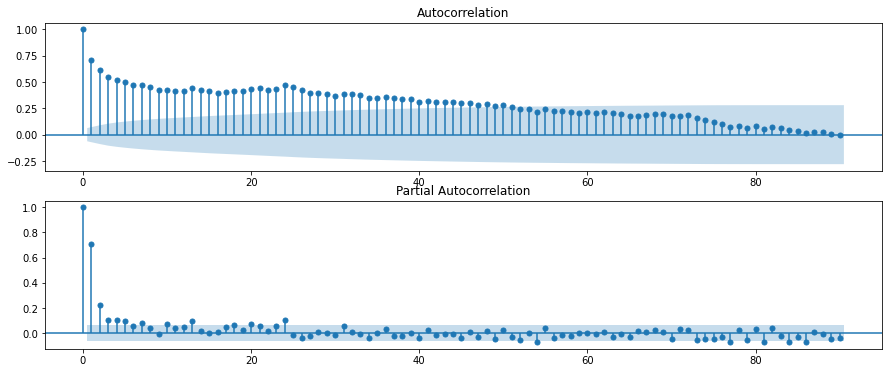

In [27]:
draw_acf_pacf(temp_00, lags=90)

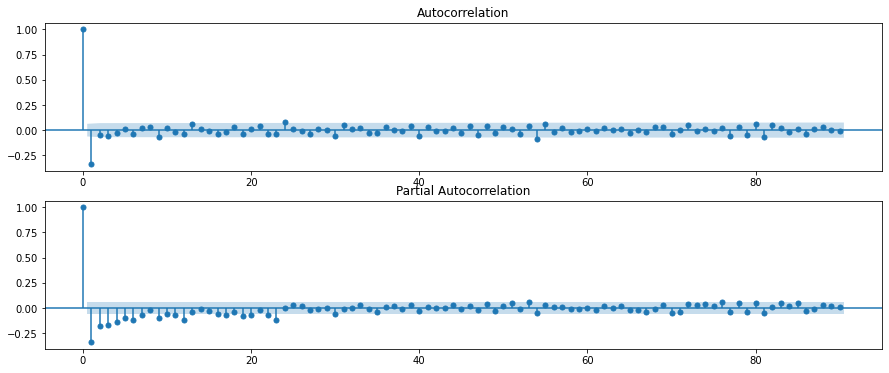

In [144]:
draw_acf_pacf(temp_00.diff().dropna(), lags=90)

check the 0 o'clock and 13:30, the plots show the similar pattern

In [300]:
train_size = int(temp_00.shape[0]*0.8)
exog_train, temp_00_train, exog_test, temp_00_test = exog[:train_size], temp_00[:train_size],exog[train_size:], temp_00[train_size:]

In [146]:
resDiff = sm.tsa.arma_order_select_ic(temp_00.diff().dropna(), max_ar=10, max_ma=3, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (3, 2) is the best.


In [301]:
mod = sm.tsa.arima.ARIMA(temp_00_train,exog=exog_train,order=(3,1,2), enforce_stationarity=False, enforce_invertibility=False)
res = mod.fit()
print(res.summary())

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  778
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1347.126
Date:                Thu, 24 Jun 2021   AIC                           2748.253
Time:                        23:36:12   BIC                           2873.845
Sample:                             0   HQIC                          2796.575
                                - 778                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365            -0.6230      0.511     -1.219      0.223      -1.624       0.378
cos365             0.3820      0.574      0.666      0.506      -0.743       1.507
sin365_2           0.0186      0.260

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


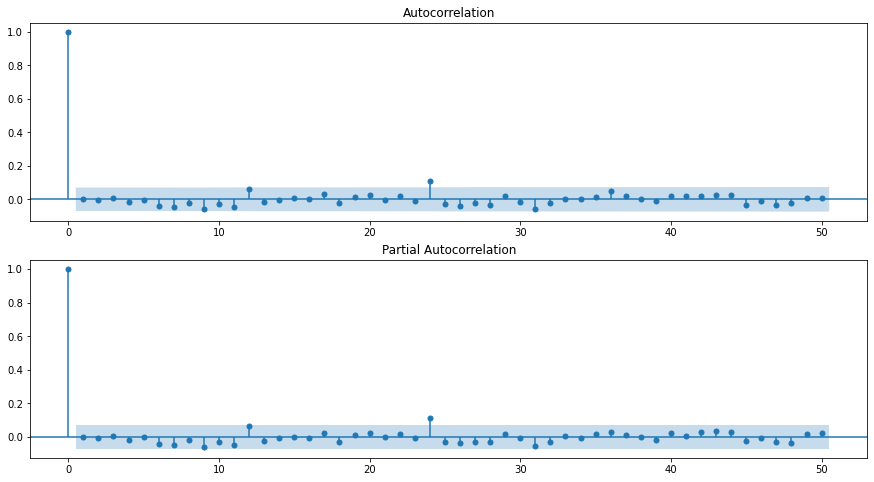

In [148]:
res = arima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [177]:
pred = res.forecast(exog_test.shape[0],exog = exog_test.values)
print('ARIMA model MSE:{}'.format(mean_squared_error(temp_00_test,pred)))

ARIMA model MSE:1.732366165961278


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


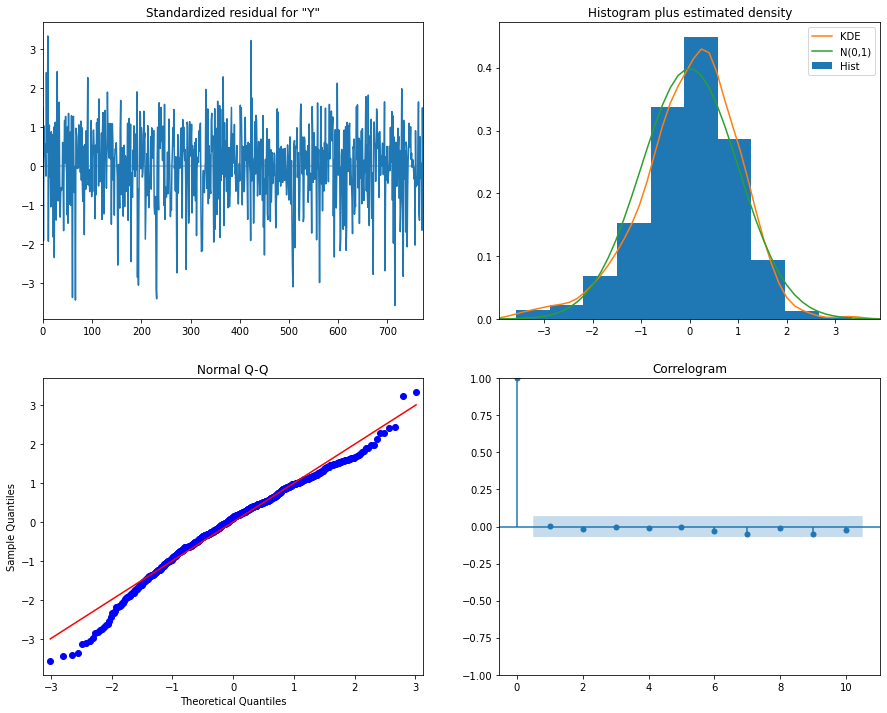

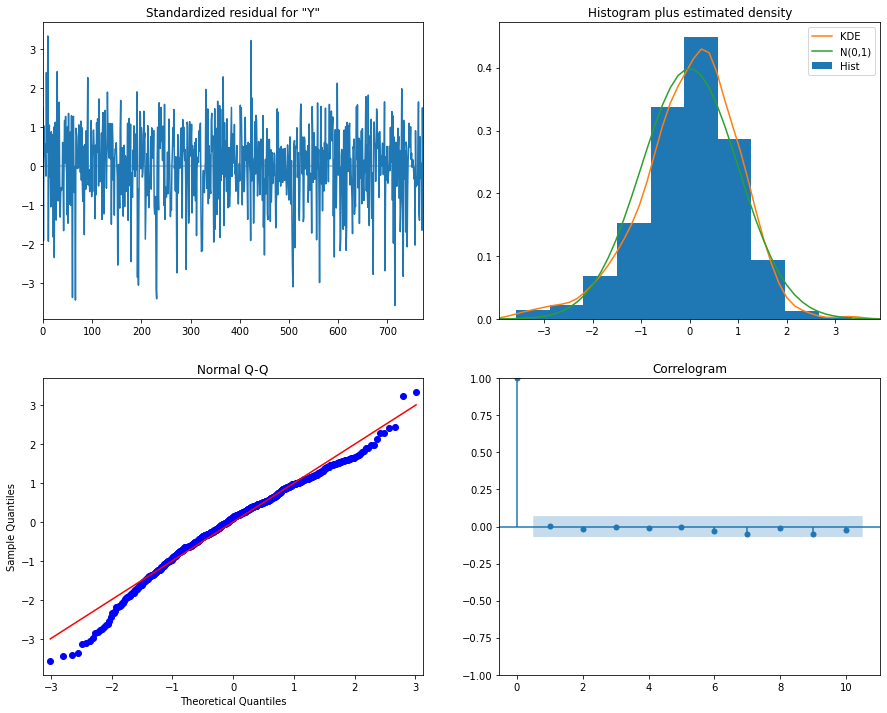

In [239]:
res.plot_diagnostics(figsize=(15, 12))

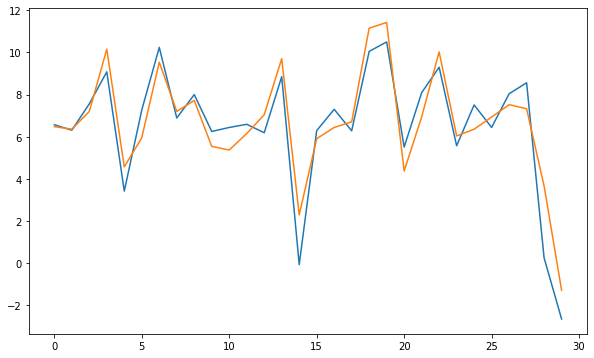

In [178]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame({'test':temp_00_test.values.reshape(1,-1)[0],'pred':pred.values.reshape(1,-1)[0]})[:30])
plt.show()

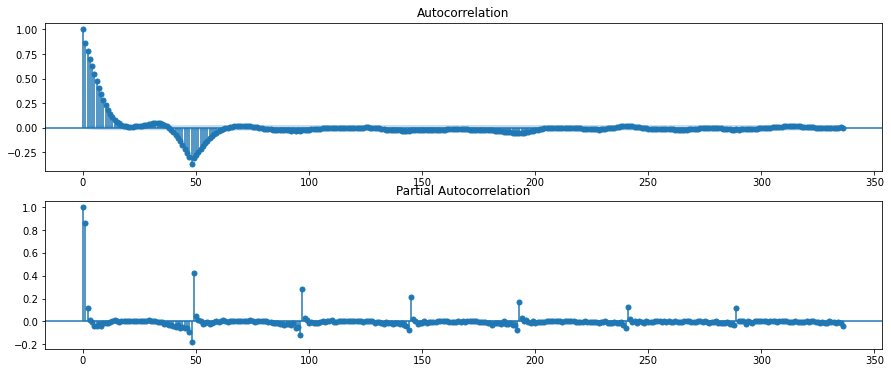

In [47]:
draw_acf_pacf((temp_ts["panel_temp_C"] - temp_ts["month_average"]).diff(periods=48).dropna(), lags=7*48)

even two order of difference are still not stationary

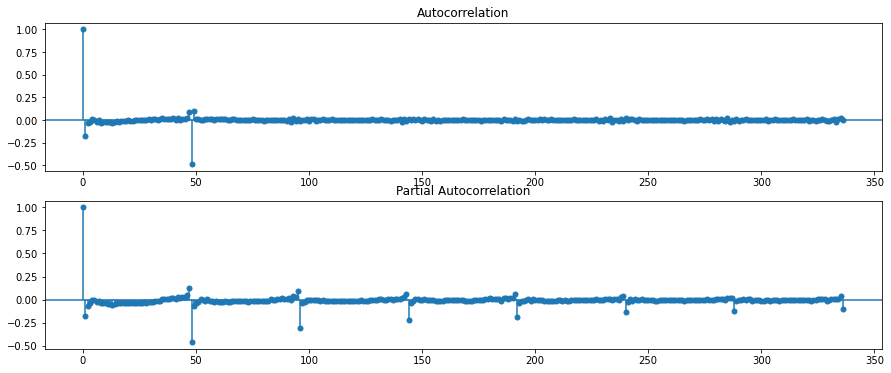

In [51]:
draw_acf_pacf((temp_ts["panel_temp_C"] - temp_ts["month_average"]).diff(periods=48).diff().dropna(), lags=7*48)

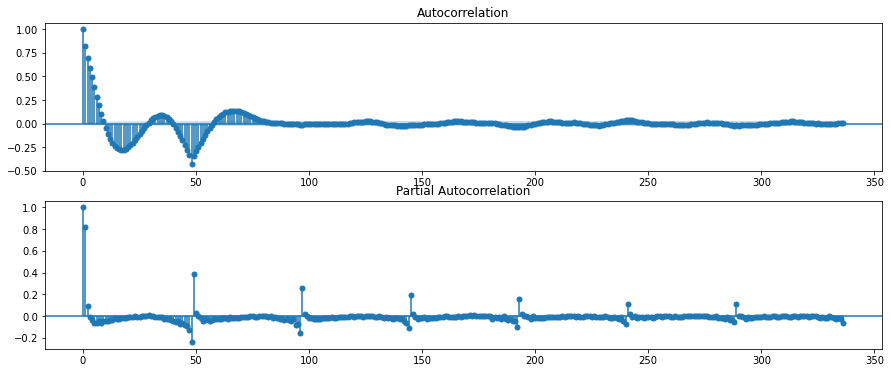

In [46]:
draw_acf_pacf((temp_ts["panel_temp_C"] - temp_ts["day_average"]).diff(periods=48).dropna(), lags=7*48)

Removing both the daily and monthly average values has the similar pattem to only remove the monthly average values. But it is better than only remove the daily average values by the acf plot

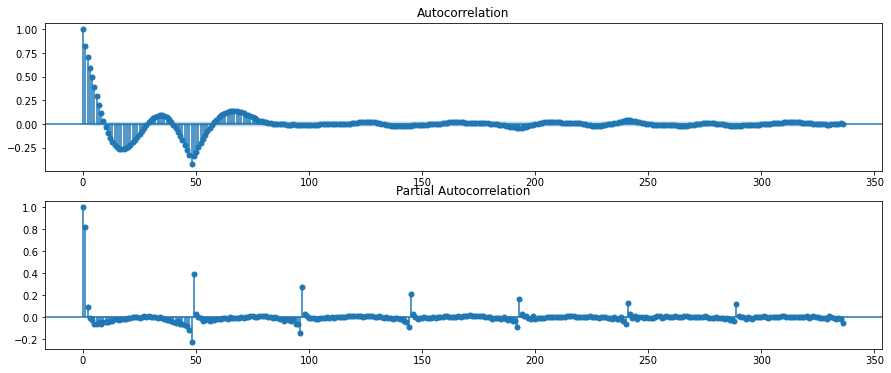

In [48]:
draw_acf_pacf((temp_ts["panel_temp_C"] - temp_ts["month_average"]-temp_ts["day_average"]).diff(periods=48).dropna(), lags=7*48)

since we can only use the data after the 48 half hours,though the acf plots converge after about 60 periods, it is hardly for us to use MA models. We can use the AR model with at least variables as possible.

In [ ]:
draw_acf_pacf((pv_train_set_new["panel_temp_C"]-pv_train_set_new["panel_temp_C"].shift(48))[48:].values, lags=365) # irradiance_Wm-2   panel_temp_C  pv_power_mw

In [ ]:
# pv_temp_df = pv_temp_df.rename(columns={"panel_temp_C":"Y"})
# X, Y = temp_sol_reg_data(False, pv_temp_df, temp_weather_df)
# R2,MSE,temp_o_reg =  linear_predict("temp",X,Y, True)

## time series End 

Lasso picked 13 features and eliminated the other 17 features


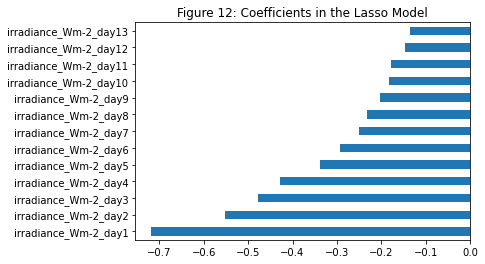

In [152]:
solar_diff = pv_train_set_new.loc[:,["datetime","irradiance_Wm-2"]]
solar_diff["irradiance_Wm-2"] = solar_diff["irradiance_Wm-2"].diff(periods=48)
solar_diff.dropna(how="any",inplace=True)
solar_diff.reset_index(drop=True,inplace=True)
solar_diff = merge_day_before_n(solar_diff, 30, solar_diff)
solar_diff.dropna(how="any",inplace=True)
X, Y = solar_diff.iloc[:,2:], solar_diff.iloc[:,1]
lasso_regression(X, Y)

In [ ]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]], 14, pv_train_set.iloc[:,[0,3]])
X, Y = temp_sol_reg_data(False, pv_temp_df, temp_weather_df)
lasso_regression(X, Y)

In [137]:
a = pd.Series([1,2,3,4,5])
sum(abs(a)>3)
a[abs(a)>3].sort_values()

3    4
4    5
dtype: int64

In [ ]:
pv_temp_df = merge_day_before_n(pv_train_set.iloc[:,[0,3]], 7,pv_train_set.iloc[:,[0,3]])
X, Y = temp_sol_reg_data(True, pv_temp_df, temp_weather_df)
R2,MSE,temp_h_reg =  linear_predict("temp",X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [26]:
plt.plot(np.diff(pv_train_set_new["pv_power_mw"],n=1)-pv_train_set_new["pv_power_mw"].diff(periods=48).dropna())

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

Data for half o'clock

In [32]:
pv_train_set_new["pv_power_mw"].diff(periods=48).dropna().diff(periods=48).dropna()

96       0.0
97       0.0
98       0.0
99       0.0
100      0.0
        ... 
46699    0.0
46700    0.0
46701    0.0
46702    0.0
46703    0.0
Name: pv_power_mw, Length: 46572, dtype: float64

In [31]:
46620-48

46572

## draft

In [32]:
tem_sol = 4
a = np.arange(0,7) if tem_sol == 3 else np.append(0,np.arange(7,13))
a

array([ 0,  7,  8,  9, 10, 11, 12])

In [83]:
"a"+ ("sdf" if 1==2 else "")

'a'

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0.7963312099827221
16.046740206793608


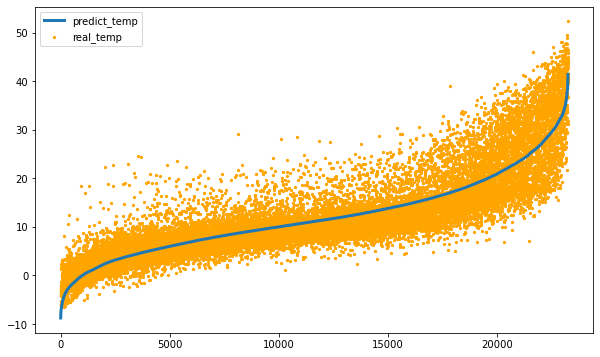

In [68]:
X,Y = temp_sol_reg_data(3,"0")
temp_reg = LinearRegression().fit(X, Y)
print(temp_reg.score(X,Y))
predict_Y = temp_reg.predict(X)
print(mean_squared_error(Y,predict_Y))
draw_predict_Y_ascent(predict_Y, Y)

In [73]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, Y)
clf.score(X, Y)

0.7963312033826567

In [13]:
pv_train_set.drop(np.arange(48)).reset_index(drop=True)

,datetime,irradiance_Wm-2,pv_power_mw,panel_temp_C
0,2017-11-04 00:00:00,0.0,0.0,12.59
1,2017-11-04 00:30:00,0.0,0.0,12.52
2,2017-11-04 01:00:00,0.0,0.0,12.50
3,2017-11-04 01:30:00,0.0,0.0,12.43
4,2017-11-04 02:00:00,0.0,0.0,12.17
...,...,...,...,...
46651,2020-07-02 21:30:00,0.0,0.0,9.08
46652,2020-07-02 22:00:00,0.0,0.0,8.91
46653,2020-07-02 22:30:00,0.0,0.0,8.94
46654,2020-07-02 23:00:00,0.0,0.0,8.77


In [85]:
def draw_predict_Y_ascent(predict_Y, Y,temp_sol, o_half):
    plt.figure(figsize=(10,6))
    Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y,"Y":Y}).sort_values("predict_Y").reset_index()
    plt.plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3)
    plt.scatter(Y_predict_Y.index, Y_predict_Y.Y, c='orange', s=5)
    plt.legend(["predict_"+temp_sol,"real_temp"+temp_sol])
    plt.show()

In [ ]:
#     print(X)
#     raise RuntimeError

In [49]:
def merge_day_before_n_1(df, n, df_before):
    # used when the drop the columns
    m = n
    while n>0:
        df_before.index = df_before.index + 48
        df = df.join(df_before, rsuffix="_day"+str(m-n+1), how = "left")
        n -= 1
    
    df.sort_index(axis=1, inplace = True)
    # the even columns are "datetime", we delete these columns which are the day before
    df.drop(columns=df.columns[np.arange(1,m+1)],inplace = True,axis=1)    
    return df

In [ ]:
# pv_train_set_new = pv_train_set.dropna(how="any",axis=0)
# pv_train_set_na = pv_train_set[pv_train_set.isna().any(axis=1)]

In [ ]:
        #　latter we will not consider the time series of the data, and the following join process only depends on index
        #  ,thus using "inner" which do not care deleting the na rows

[ 1.03170427e-01 -0.00000000e+00  5.38168042e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.19429690e-03  0.00000000e+00  0.00000000e+00
  5.81839551e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -2.41952257e-03 -0.00000000e+00 -4.37929905e-03 -2.23880562e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.85257956e-02
 -1.34912966e-03  1.32499442e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.72120103e-02 -1.91625412e-02 -1.23480492e-04
 -0.00000000e+00 -2.24667833e-02 -0.00000000e+00 -0.00000000e+00
 -1.55981973e-02  0.00000000e+00  0.00000000e+00 -1.00372538e-02
 -0.00000000e+00 -3.76058995e-03  0.00000000e+00 -2.38864733e-03
  0.00000000e+00 -0.00000000e+00 -3.17643577e-04 -1.13457821e-02
  0.00000000e+00 -7.53447522e-03 -7.64671930e-03 -0.00000000e+00
  1.26847293e-02  0.00000

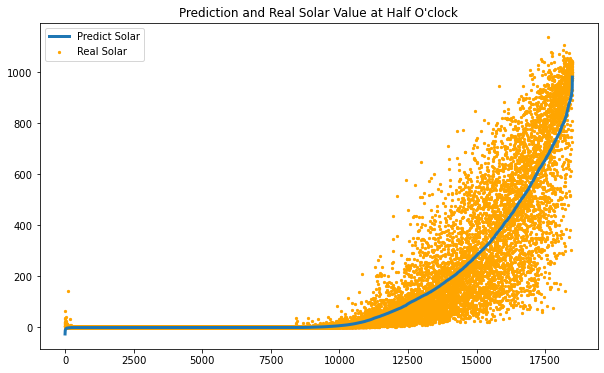

Coefficient of determination R2 is : 0.844075 and MSE is: 9193.846027


In [188]:
# the result for ElasticNetCV using the data of 100 days before
pv_sol_df = merge_day_before_n(pv_train_set.iloc[:,[0,1]], 100,pv_train_set.iloc[:,[0,1]])
X,Y = temp_sol_reg_data(True, pv_sol_df, sol_weather_df)
R2,MSE,sol_h_reg =  linear_predict(False,X,Y, True)
print("Coefficient of determination R2 is : %f and MSE is: %f" % (R2,MSE))

In [95]:
# deal with the na in pv data
pv_train_set_new = pv_train_set.copy(deep=True)
while pv_train_set_new.iloc[:,3].isna().any():
    
    tem_na_row =  pv_train_set_new[pv_train_set_new.iloc[:,3].isna()].iloc[[0],[0,3]]
    # to locate the row in the pv_train_set_new
    tem_na_row_index = tem_na_row.index
    # choose the regressor according to weather it is half o'clock
    regressor = temp_h_reg if tem_na_row.iloc[0,0][14] == "3" else temp_o_reg 

    tem_na_row = merge_day_before_n(tem_na_row, 2, pv_train_set_new.iloc[:,[0,3]]).reset_index(drop=True)   
    weather_row = temp_weather_df[temp_weather_df["datetime"].str[:13]==tem_na_row.iloc[0,0][:13]].iloc[:,1:].reset_index(drop=True)
    
    X = np.array(pd.concat([tem_na_row.iloc[:,2:],weather_row],axis=1))
    
    pv_train_set_new.iloc[tem_na_row_index,3] = regressor.predict(X)
    print(pv_train_set_new.iloc[tem_na_row_index,3])
    break

1233    5.362865
Name: panel_temp_C, dtype: float64


In [48]:
pv_train_set_new.filter(regex='(\d$)|(C$)', axis=1)

,irradiance_Wm-2,panel_temp_C
0,0.0,7.05
1,0.0,7.38
2,0.0,7.70
3,0.0,7.48
4,0.0,7.20
...,...,...
46699,0.0,9.08
46700,0.0,8.91
46701,0.0,8.94
46702,0.0,8.77


In [61]:
pv_pv_df = merge_day_before_n(pv_train_set_new, 3, pv_train_set_new.iloc[:,[0,2]])
Y = pv_pv_df["pv_power_mw"]
X = pv_pv_df.filter(regex='(\d$)|(C$)', axis=1)
X.describe()

,irradiance_Wm-2,panel_temp_C,panel_temp_C_day1,panel_temp_C_day2,panel_temp_C_day3
count,46704.000000,46704.000000,46656.000000,46608.000000,46560.000000
mean,150.214178,12.104529,12.099807,12.093775,12.091507
std,253.056997,8.868300,8.868660,8.868588,8.872626
min,0.000000,-6.500000,-6.500000,-6.500000,-6.500000
25%,0.000000,6.520000,6.520000,6.510000,6.510000
50%,2.305000,10.000000,10.000000,9.995000,9.990000
75%,194.952500,15.350000,15.342500,15.340000,15.340000
max,1159.860000,52.310000,52.310000,52.310000,52.310000


In [ ]:
#         plt.figure(figsize=(10,6))
#         Y_predict_Y = pd.DataFrame({"predict_Y":predict_Y,"y_test":y_test}).sort_values("predict_Y").reset_index()
#         plt.plot(Y_predict_Y.index,Y_predict_Y.predict_Y, linewidth=3)
#         plt.scatter(Y_predict_Y.index, Y_predict_Y.y_test, c='orange', s=5)
#         plt.plot(np.arange(48*7),predict_Y, linewidth=3)
#         plt.scatter(np.arange(48*7), y_test, c='orange', s=5)       
        
#         plt.legend(["Predict "+ name,"Real "+ name]) 
#         title = "Prediction and Real " +  name +" Value"
#         plt.title(title)
#         plt.show()
#     temp_reg = LinearRegression().fit(X_train, y_train)    
#     predict_Y = temp_reg.predict(X_test) 

#     R2 = temp_reg.score(X_test,y_test)
#     MSE = mean_squared_error(y_test,predict_Y)
#     EVS = explained_variance_score(y_test,predict_Y)

In [ ]:
    temp_reg = OLS(y_train, add_constant(X_train)).fit()
    predict_Y = temp_reg.predict(add_constant(X_test))
    
#     score1 = temp_reg.aic
#     score2 = mean_squared_error(y_test,predict_Y)

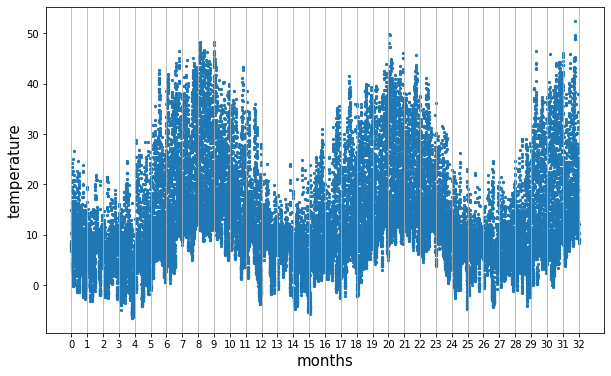

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(pv_train_set.index,pv_train_set["panel_temp_C"],s=5)
# 2+12*2+7 = 33
plt.xticks(ticks = np.linspace(0,pv_train_set.shape[0],33),labels = list(map(int,np.linspace(0,32,33))))
plt.grid(axis='x')
plt.xlabel("months",size=15)
plt.ylabel("temperature",size=15)
plt.show()

In [52]:
pd.DatetimeIndex(temp_date_df.index)

DatetimeIndex(['2017-11-03 00:00:00', '2017-11-03 00:30:00',
               '2017-11-03 01:00:00', '2017-11-03 01:30:00',
               '2017-11-03 02:00:00', '2017-11-03 02:30:00',
               '2017-11-03 03:00:00', '2017-11-03 03:30:00',
               '2017-11-03 04:00:00', '2017-11-03 04:30:00',
               ...
               '2020-07-02 19:00:00', '2020-07-02 19:30:00',
               '2020-07-02 20:00:00', '2020-07-02 20:30:00',
               '2020-07-02 21:00:00', '2020-07-02 21:30:00',
               '2020-07-02 22:00:00', '2020-07-02 22:30:00',
               '2020-07-02 23:00:00', '2020-07-02 23:30:00'],
              dtype='datetime64[ns]', name='datetime', length=46704, freq=None)

In [76]:
monthly_mean-monthly_mean.shift(12)

,panel_temp_C
datetime,
2017-11-30,NaN
2017-12-31,NaN
2018-01-31,NaN
2018-02-28,NaN
2018-03-31,NaN
2018-04-30,NaN
2018-05-31,NaN
2018-06-30,NaN
2018-07-31,NaN


In [ ]:
# grid search sarima hyperparameters for monthly car sales dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

 
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
  # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
    # one failure during model validation suggests an unstable config
        try:
      # never show warnings when grid searching, too noisy
            with catch_warnings():
            filterwarnings("ignore")
            result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
  # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models
 
if __name__ == '__main__':
    data = (temp_ts["panel_temp_C"] - temp_ts["month_average"]).diff(periods=48).diff().dropna()
    print(data.shape)
    # data split
    n_test = 12
    # model configs
    cfg_list = sarima_configs(seasonal=[0,6,12])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

In [ ]:
temp_ts['sin48'] = np.sin(2 * np.pi * temp_ts["hour"] / 48)
temp_ts['cos48'] = np.cos(2 * np.pi * temp_ts["hour"] / 48)
temp_ts['sin48_2'] = np.sin(4 * np.pi * temp_ts["hour"] / 48)
temp_ts['cos48_2'] = np.cos(4 * np.pi * temp_ts["hour"] / 48)

temp_ts['sin365'] = np.sin(2 * np.pi * temp_ts.index.dayofyear / 365.25)
temp_ts['cos365'] = np.cos(2 * np.pi * temp_ts.index.dayofyear / 365.25)
temp_ts['sin365_2'] = np.sin(4 * np.pi * temp_ts.index.dayofyear / 365.25)
temp_ts['cos365_2'] = np.cos(4 * np.pi * temp_ts.index.dayofyear / 365.25)
temp_ts

In [160]:
def add_freq(idx, freq=None):
    """Add a frequency attribute to idx, through inference or directly.

    Returns a copy.  If `freq` is None, it is inferred.
    """

    idx = idx.copy()
    if freq is None:
        if idx.freq is None:
            freq = pd.infer_freq(idx)
        else:
            return idx
    idx.freq = pd.tseries.frequencies.to_offset(freq)
    if idx.freq is None:
        raise AttributeError('no discernible frequency found to `idx`.  Specify'
                             ' a frequency string with `freq`.')
    return idx

In [162]:
idx = pd.DatetimeIndex(temp_00.index.str[:10])
add_freq(idx,freq='D')

ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [248]:
pdq=(2,1,3)
sp = sq = range(1,8)
#range(0,1) <- ARIMAX 
seasonal_pdq = list(itertools.product(sp, [0,1], sq,[1]))#rlist(itertools.product(sp, [0], sq,[0]))<- ARIMAX
params_s = [] 
aics = [] 
mses = [] 
cnt = 0  
for param_seasonal in seasonal_pdq:
#     try:
    mod = sm.tsa.statespace.SARIMAX(temp_00_train,
                                    order=pdq,
                                    exog = exog_train,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit()
    pred = results.get_prediction(start = train_size-1,
                              end = temp_00.shape[0]-1,exog=exog_test)

    params_s.append(param_seasonal)
    aics.append(results.aic)
    mses.append(mean_squared_error(tes,pred.predicted_mean[1:]))


    #if cnt % 8 == 0:
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(pdq, param_seasonal,
                                                    results.aic,
                                                mses[-1]))
            #cnt += 1

#     except:
#         raise RuntimeError
#         continue

min_ind = aics.index(min(aics)) 
bestparam = (pdq,params_s[min_ind]) 
print('best_param_aic:',bestparam,' aic:',min(aics)) 
min_ind = mses.index(min(mses)) 
bestparam = (pdq,params_s[min_ind]) 
print('best_param_mse:',bestparam,' mse:',min(mses))
print('Finish!!')

ValueError: Seasonal periodicity must be greater than 1.

In [95]:
def hour_reg_data(pv_df, weather_df):
    """
    description: construct the X and Y for regression
    """
    pv_df["day"] = pv_df["datetime"].apply(calculate_day)
    pv_df['sin365'] = np.sin(2 * np.pi * pv_df["day"] / 365.25)
    pv_df['cos365'] = np.cos(2 * np.pi * pv_df["day"] / 365.25)
    pv_df['sin365_2'] = np.sin(4 * np.pi * pv_df["day"] / 365.25)
    pv_df['cos365_2'] = np.cos(4 * np.pi * pv_df["day"] / 365.25)
    
    pv_df.drop(columns=["day"],axis=1,inplace=True)
    
    weather_df["datetime"] = weather_df["datetime"].str[:13]
    pv_df["datetime"] = pv_df["datetime"].str[:13]
    joined_data = pv_df.set_index("datetime").join(weather_df.set_index("datetime"),on="datetime", how="left")
    
    joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
#     joined_data.dropna(how="any",axis=0,inplace=True)
    Y, X = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y"],axis=1)
    return X, Y
# temp_sol_reg_data(3,"0")    

In [147]:
arima = sm.tsa.statespace.SARIMAX(temp_00_train,exog=exog_train,order=(3,1,2), enforce_stationarity=False, enforce_invertibility=False).fit()
arima.summary()

D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      Y   No. Observations:                  778
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -1346.692
Date:                Thu, 24 Jun 2021   AIC                           2749.384
Time:                        20:07:12   BIC                           2879.628
Sample:                             0   HQIC                          2799.495
                                - 778                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
sin365            -0.6490      0.524     -1.239      0.215      -1.676       0.378
cos365             0.2700      0.591      0.457      0.648      -0.888       1.428
sin365_2          -0.0333      0.266     -0.125      0.901      -0.555       0.489
cos365_2           0.1204      0.264      0.456      0.649      -0.397       0.638
month-1            0.7828      0.608      1.288      0.198      -0.408       1.974
month-2            1.3458      0.628      2.143      0.032       0.115       2.577
month-3            1.6718      0.609      2.747      0.006       0.479       2.865
month-4            1.4887      0.617      2.413      0.016       0.279       2.698
month-5            0.1630      0.622      0.262      0.793      -1.055       1.381
month-6           -0.3387      0.632     -0.536      0.592      -1.577       0.899
month-7           -1.5975      0.617     -2.588      0.010      -2.808      -0.387
month-8           -1.4198      0.588     -2.414      0.016      -2.572      -0.267
month-9           -1.2123      0.575     -2.110      0.035      -2.339      -0.086
month-10          -0.7985      0.584     -1.366      0.172      -1.944       0.347
month-11          -0.3206      0.593     -0.541      0.589      -1.483       0.842
month-12           0.2349      0.621      0.378      0.705      -0.982       1.451
temp_location1     1.4573      0.143     10.168      0.000       1.176       1.738
temp_location2     0.4814      0.136      3.541      0.000       0.215       0.748
temp_location3    -0.5945      0.102     -5.808      0.000      -0.795      -0.394
temp_location4     0.2213      0.052      4.237      0.000       0.119       0.324
temp_location5    -0.7280      0.247     -2.946      0.003      -1.212      -0.244
temp_location6     0.3715      0.244      1.525      0.127      -0.106       0.849
ar.L1             -0.7138      0.345     -2.069      0.039      -1.390      -0.038
ar.L2              0.0682      0.046      1.497      0.134      -0.021       0.157
ar.L3             -0.0010      0.002     -0.485      0.628      -0.005       0.003
ma.L1             -0.2059      1.235     -0.167      0.868      -2.626       2.214
ma.L2             -0.7942      0.999     -0.795      0.427      -2.753       1.164
sigma2             1.8952      2.259      0.839      0.401      -2.532       6.322
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                59.48
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.54
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition 

In [183]:
# from sklearn.metrics import mean_squared_error
pred = arima.predict(train_size,temp_00.shape[0]-1,exog = exog_test.values)
print('ARIMA model MSE:{}'.format(mean_squared_error(temp_00_test,pred)))

ARIMA model MSE:1.732366165961278


D:\language\Anaconda3\envs\deep_learning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [37]:
temp_ts["hour"] = (temp_ts.index.hour*2+temp_ts.index.minute/30).tolist()

In [116]:
from pmdarima.arima import auto_arima
Y_train = Y.iloc[:-48*2]
X_train = X.iloc[:-48*2]
Y_test = Y.iloc[-48*2:]
X_test = X.iloc[-48*2:]
# Fit model
arima_exog_model = auto_arima(y=temp_00,X=exog,start_p=1,d=1,start_q=1,max_p=10,max_q=3, seasonal=True, D=1,m=365)
# Forecast
y_arima_exog_forecast = arima_exog_model.predict(n_periods=48*2, exogenous=X_test)

MemoryError: Unable to allocate 439. MiB for an array with shape (50, 50, 23022) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 988, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError: Unable to allocate 439. MiB for an array with shape (50, 50, 23022) and data type float64


AttributeError: Memoryview is not initialized

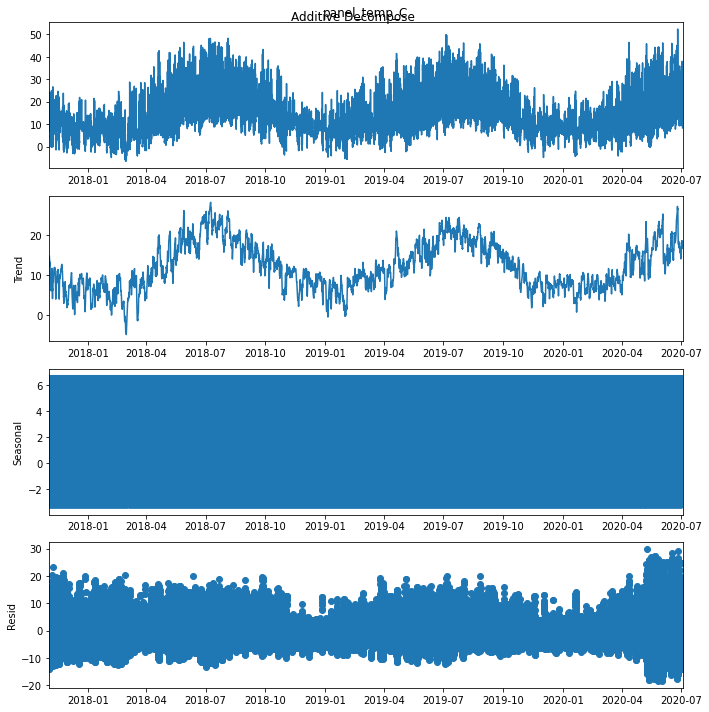

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(temp_ts["panel_temp_C"], model="additive",period=48,extrapolate_trend='freq')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams.update({'figure.figsize': (10, 10)})
decomposition.plot().suptitle('Additive Decompose')
plt.show()

In [24]:
pv_df = pv_train_set_new[["datetime","panel_temp_C"]].copy(deep=True).rename(columns={"panel_temp_C":"Y"})
weather_df = temp_weather_df.copy(deep=True)

pv_df["hour"] = pv_df["datetime"].apply(calculate_hour)
pv_df["day"] = pv_df["datetime"].apply(calculate_day)
pv_df['sin365'] = np.sin(2 * np.pi * pv_df["day"] / 365.25)
pv_df['cos365'] = np.cos(2 * np.pi * pv_df["day"] / 365.25)
pv_df['sin365_2'] = np.sin(4 * np.pi * pv_df["day"] / 365.25)
pv_df['cos365_2'] = np.cos(4 * np.pi * pv_df["day"] / 365.25)

pv_df['month'] = pv_df["datetime"].str[5:7]
month_dummies = pd.get_dummies(pv_df['month'],drop_first=True)
month_dummies.columns = ['month-'+ str(m) for m in range(2,13)]

pv_df = pd.concat([pv_df, month_dummies], axis=1).drop(columns=["day","month"],axis=1)

weather_df["datetime"] = weather_df["datetime"].str[:13]
pv_df["datetime"] = pv_df["datetime"].str[:13]
joined_data = pv_df.join(weather_df.set_index("datetime"),on="datetime", how="left")

# joined_data.index = pd.DatetimeIndex(joined_data.index.str[:10])
# joined_data.dropna(how="any",axis=0,inplace=True)
Y, X = joined_data.filter(items=["Y"],axis=1), joined_data.drop(columns=["Y","hour","datetime"],axis=1)
hour = joined_data["hour"]

In [22]:
# time series
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA 

<AxesSubplot:>

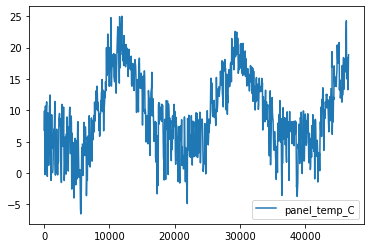

In [15]:
pv_train_set[pv_train_set["datetime"].str[11:15]=="07:0"].iloc[:,[3]].plot()

In [23]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# moveing average plots
def draw_trend(timeSeries, size):
    f = plt.figure(facecolor='white')
    ax = plt.gca()

    ax.plot(timeSeries,color='blue', label='Original')
    
    # weighted moving average of the number of size
    ax.plot(timeSeries.ewm(span=size).mean(),color='black', label='Weighted Rolling Mean')
    
    # moving average for the number of size
    # since there are many nan, and the seasonal windows are too big regard for the whole dataset
    rol_mean = timeSeries.rolling(window=size).mean()
    ax.plot(rol_mean,color='red', label='Rolling Mean')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean')
    plt.show()

def draw_ts(timeSeries):    
    f = plt.figure(facecolor='white')
    timeSeries.plot(color='blue')
    plt.show()

'''　　Unit Root Test
   The null hypothesis of the Augmented Dickey-Fuller is that there is a unit
   root, with the alternative that there is no unit root. That is to say the
   bigger the p-value the more reason we assert that there is a unit root
'''
def testStationarity(ts):
    dftest = adfuller(ts)
    # The value obtained by the above function is described semantically
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

# acf and pacf, default lags = 31
def draw_acf_pacf(ts, lags=31):
    f = plt.figure(figsize=(15.,6))
    ax1 = f.add_subplot(211)
    plot_acf(ts, lags=lags, ax=ax1)
    ax2 = f.add_subplot(212)
    plot_pacf(ts, lags=lags, ax=ax2)
    plt.show()

In [21]:
temp_ts = pv_train_set_new[["datetime","panel_temp_C"]].set_index("datetime")
# index must be the Datetime tpye to use the timeseries method in pandas
temp_ts.index = pd.DatetimeIndex(temp_ts.index)

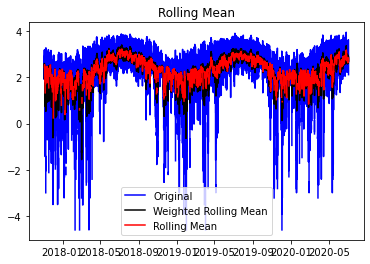

In [42]:
draw_trend(ts_log, 48)

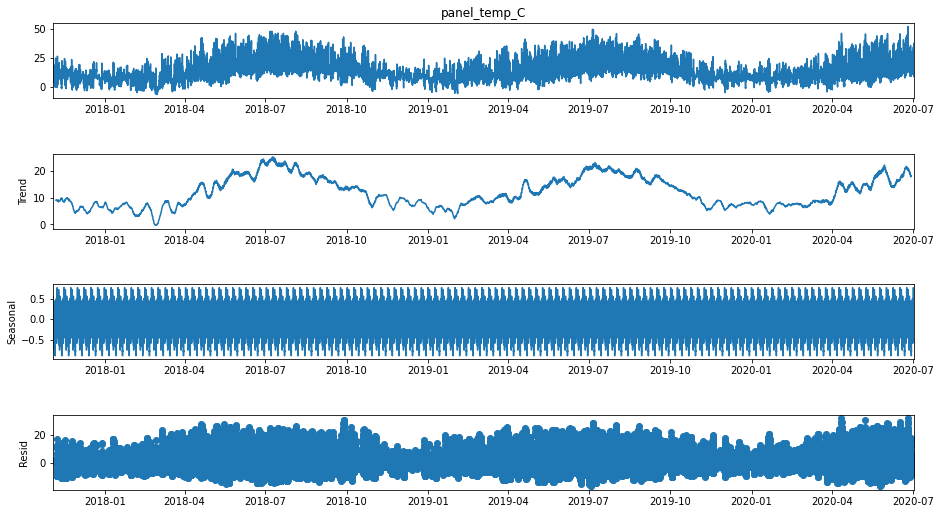

In [22]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(temp_ts["panel_temp_C"],freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [ ]:
# 功能：把函数进行傅里叶变换，变换到频域，以期获得函数的周期
# 输入：时间序列，获取频率点数值n（可选），频率对应幅度的下限值fmin（可选）
# 输入序列的X轴需要归一化为1
# 输出： n个序列的下标以及对应的幅度值
# 创建时间： 2021-1-26

import pandas as pd
import numpy as np
import math
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import seaborn
import scipy.signal as signal


def fftTransfer(timeseries, n=10, fmin=0.2):
    yf = abs(fft(timeseries))  # 取绝对值
    yfnormlize = yf / len(timeseries)  # 归一化处理
    yfhalf = yfnormlize[range(int(len(timeseries) / 2))]  # 由于对称性，只取一半区间
    yfhalf = yfhalf * 2   # y 归一化

    xf = np.arange(len(timeseries))  # 频率
    xhalf = xf[range(int(len(timeseries) / 2))]  # 取一半区间


    plt.subplot(211)
    x = np.arange(len(timeseries))  # x轴
    plt.plot(x, timeseries)
    plt.title('Original wave')

    plt.subplot(212)
    plt.plot(xhalf, yfhalf, 'r')
    plt.title('FFT of Mixed wave(half side frequency range)', fontsize=10, color='#7A378B')  # 注意这里的颜色可以查询颜色代码表

    fwbest = yfhalf[signal.argrelextrema(yfhalf, np.greater)]
    xwbest = signal.argrelextrema(yfhalf, np.greater)
    plt.plot(xwbest[0][:n], fwbest[:n], 'o', c='yellow')
    plt.show(block=False)
    plt.show()

    xorder = np.argsort(-fwbest)  # 对获取到的极值进行降序排序，也就是频率越接近，越排前
    print('xorder = ', xorder)
    print(type(xorder))
    xworder = list()
    xworder.append(xwbest[x] for x in xorder)  # 返回频率从大到小的极值顺序
    fworder = list()
    fworder.append(fwbest[x] for x in xorder)  # 返回幅度

    if len(fwbest) <= n:
        fwbest = fwbest[fwbest >= fmin].copy()
        return len(timeseries)/xwbest[0][:len(fwbest)], fwbest    #转化为周期输出
    else:
        fwbest = fwbest[fwbest >= fmin].copy()
        print(len(fwbest))
        print(xwbest)
        return len(timeseries)/xwbest[0][:len(fwbest)], fwbest  # 只返回前n个数   #转化为周期输出b

In [ ]:
fftTransfer(temp_00, n=3, fmin=0.002)

In [ ]:
# deal with the na in pv data
# pv_train_set_new = pv_train_set.copy(deep=True)
def fill_na(column, n, df_fill=pv_train_set_new): 
    """
    n: merge the data of n day before
    """
    if column=="temp":
        pv_column = 3
        weather_df = temp_weather_df.copy(deep=True)
        regressors = [temp_o_reg, temp_h_reg]
    elif column == "solar":
        pv_column = 1
        weather_df = sol_weather_df.copy(deep=True)
        regressors = [sol_o_reg, sol_h_reg]
        
    
    na_row = df_fill[df_fill.iloc[:,pv_column].isna()].iloc[:,[0,pv_column]]
    
    na_row = na_row.rename(columns={na_row.columns[1]:"Y"})
    na_row = merge_day_before_n(na_row, n, df_fill.iloc[:,[0,pv_column]])
    
    
    
    o_na_row = na_row[na_row["datetime"].str[14] == "0"]
    h_na_row = na_row[na_row["datetime"].str[14] == "3"]
    na_row_o_index = o_na_row.index
    na_row_h_index = h_na_row.index
    
    o_X = temp_sol_reg_data(False, o_na_row, weather_df,True)
    print(o_X)
    predict_o_y = regressors[0].predict(o_X)
    df_fill.iloc[na_row_o_index,pv_column] = predict_o_y
    
    h_X = temp_sol_reg_data(True, h_na_row, weather_df,True)
    predict_h_y = regressors[1].predict(h_X)
    df_fill.iloc[na_row_h_index,pv_column] = predict_h_y           
fill_na("temp",2)
# fill_na("solar",0)

In [ ]:
#         exog_train, ts_train, exog_test, ts_test = X_train[hour_train==i], Y_train[hour_train==i],X_test[hour_test==i], Y_test[hour_test==i]
#         exog = X_train[hour==i]
#         ts = Y_train[hour==i]
#         train_size = int(ts.shape[0]*0.8)


#         if (ts_train==0).astype(int).sum()[0] > ts_train.shape[0]*0.99:
#             arimax = 0
# #             ts_test = ts[train_size:]
#             test_pred = np.zeros(Y_test.shape[0])            
#         else:
            
#             resDiff = sm.tsa.arma_order_select_ic(ts_train.diff().dropna(), max_ar=6, max_ma=3, ic='aic', trend='c')
#             p,q = resDiff['aic_min_order']
#             arimax = sm.tsa.arima.ARIMA(ts_train,exog=exog_train,order=(p,1,q), enforce_stationarity=False, enforce_invertibility=False).fit()
#             test_pred = arimax.forecast(ts_test.shape[0],exog = exog_test.values).values
#         Y_test = pd.concat([Y_test, ts_test],axis=0)
#         Y_pred = pd.concat([Y_pred, pd.DataFrame(data={"Y_pred":test_pred},index=ts_test.index)],axis=0)
#         arimaxs.append(arimax)
#     Y_test.sort_index(inplace=True)